## About Dataset
In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes.

## objective
The objective is to develop a machine learning model that can predict if a customer is a good or bad payer.


## Content
 The attributes are:

- Age (numeric)
- Sex (text: male, female)
- Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
- Housing (text: own, rent, or free)
- Saving accounts (text - little, moderate, quite rich, rich)
- Checking account (numeric, in DM - Deutsch Mark)
- Credit amount (numeric, in DM)
- Duration (numeric, in month)
- Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
import matplotlib as mpl #recurso adicional de plotagem
mpl.rcParams['figure.dpi'] = 400 #figuras em alta resolução

# Descriptive analysis
Checking the basic data integrity

In [66]:
df = pd.read_csv('german_credit_data.csv')

In [67]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [68]:
df.tail()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad
999,999,27,male,2,own,moderate,moderate,4576,45,car,good


In [69]:
df.shape

(1000, 11)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [71]:
df.nunique().sort_values()

Sex                    2
Risk                   2
Housing                3
Checking account       3
Job                    4
Saving accounts        4
Purpose                8
Duration              33
Age                   53
Credit amount        921
Unnamed: 0          1000
dtype: int64

# Numerical attributes

In [72]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,499.50,288.82,0.0,249.75,499.5,749.25,999.0
Age,1000.0,35.55,11.38,19.0,27.00,33.0,42.00,75.0
Job,1000.0,1.90,0.65,0.0,2.00,2.0,2.00,3.0
Credit amount,1000.0,3271.26,2822.74,250.0,1365.50,2319.5,3972.25,18424.0
Duration,1000.0,20.90,12.06,4.0,12.00,18.0,24.00,72.0


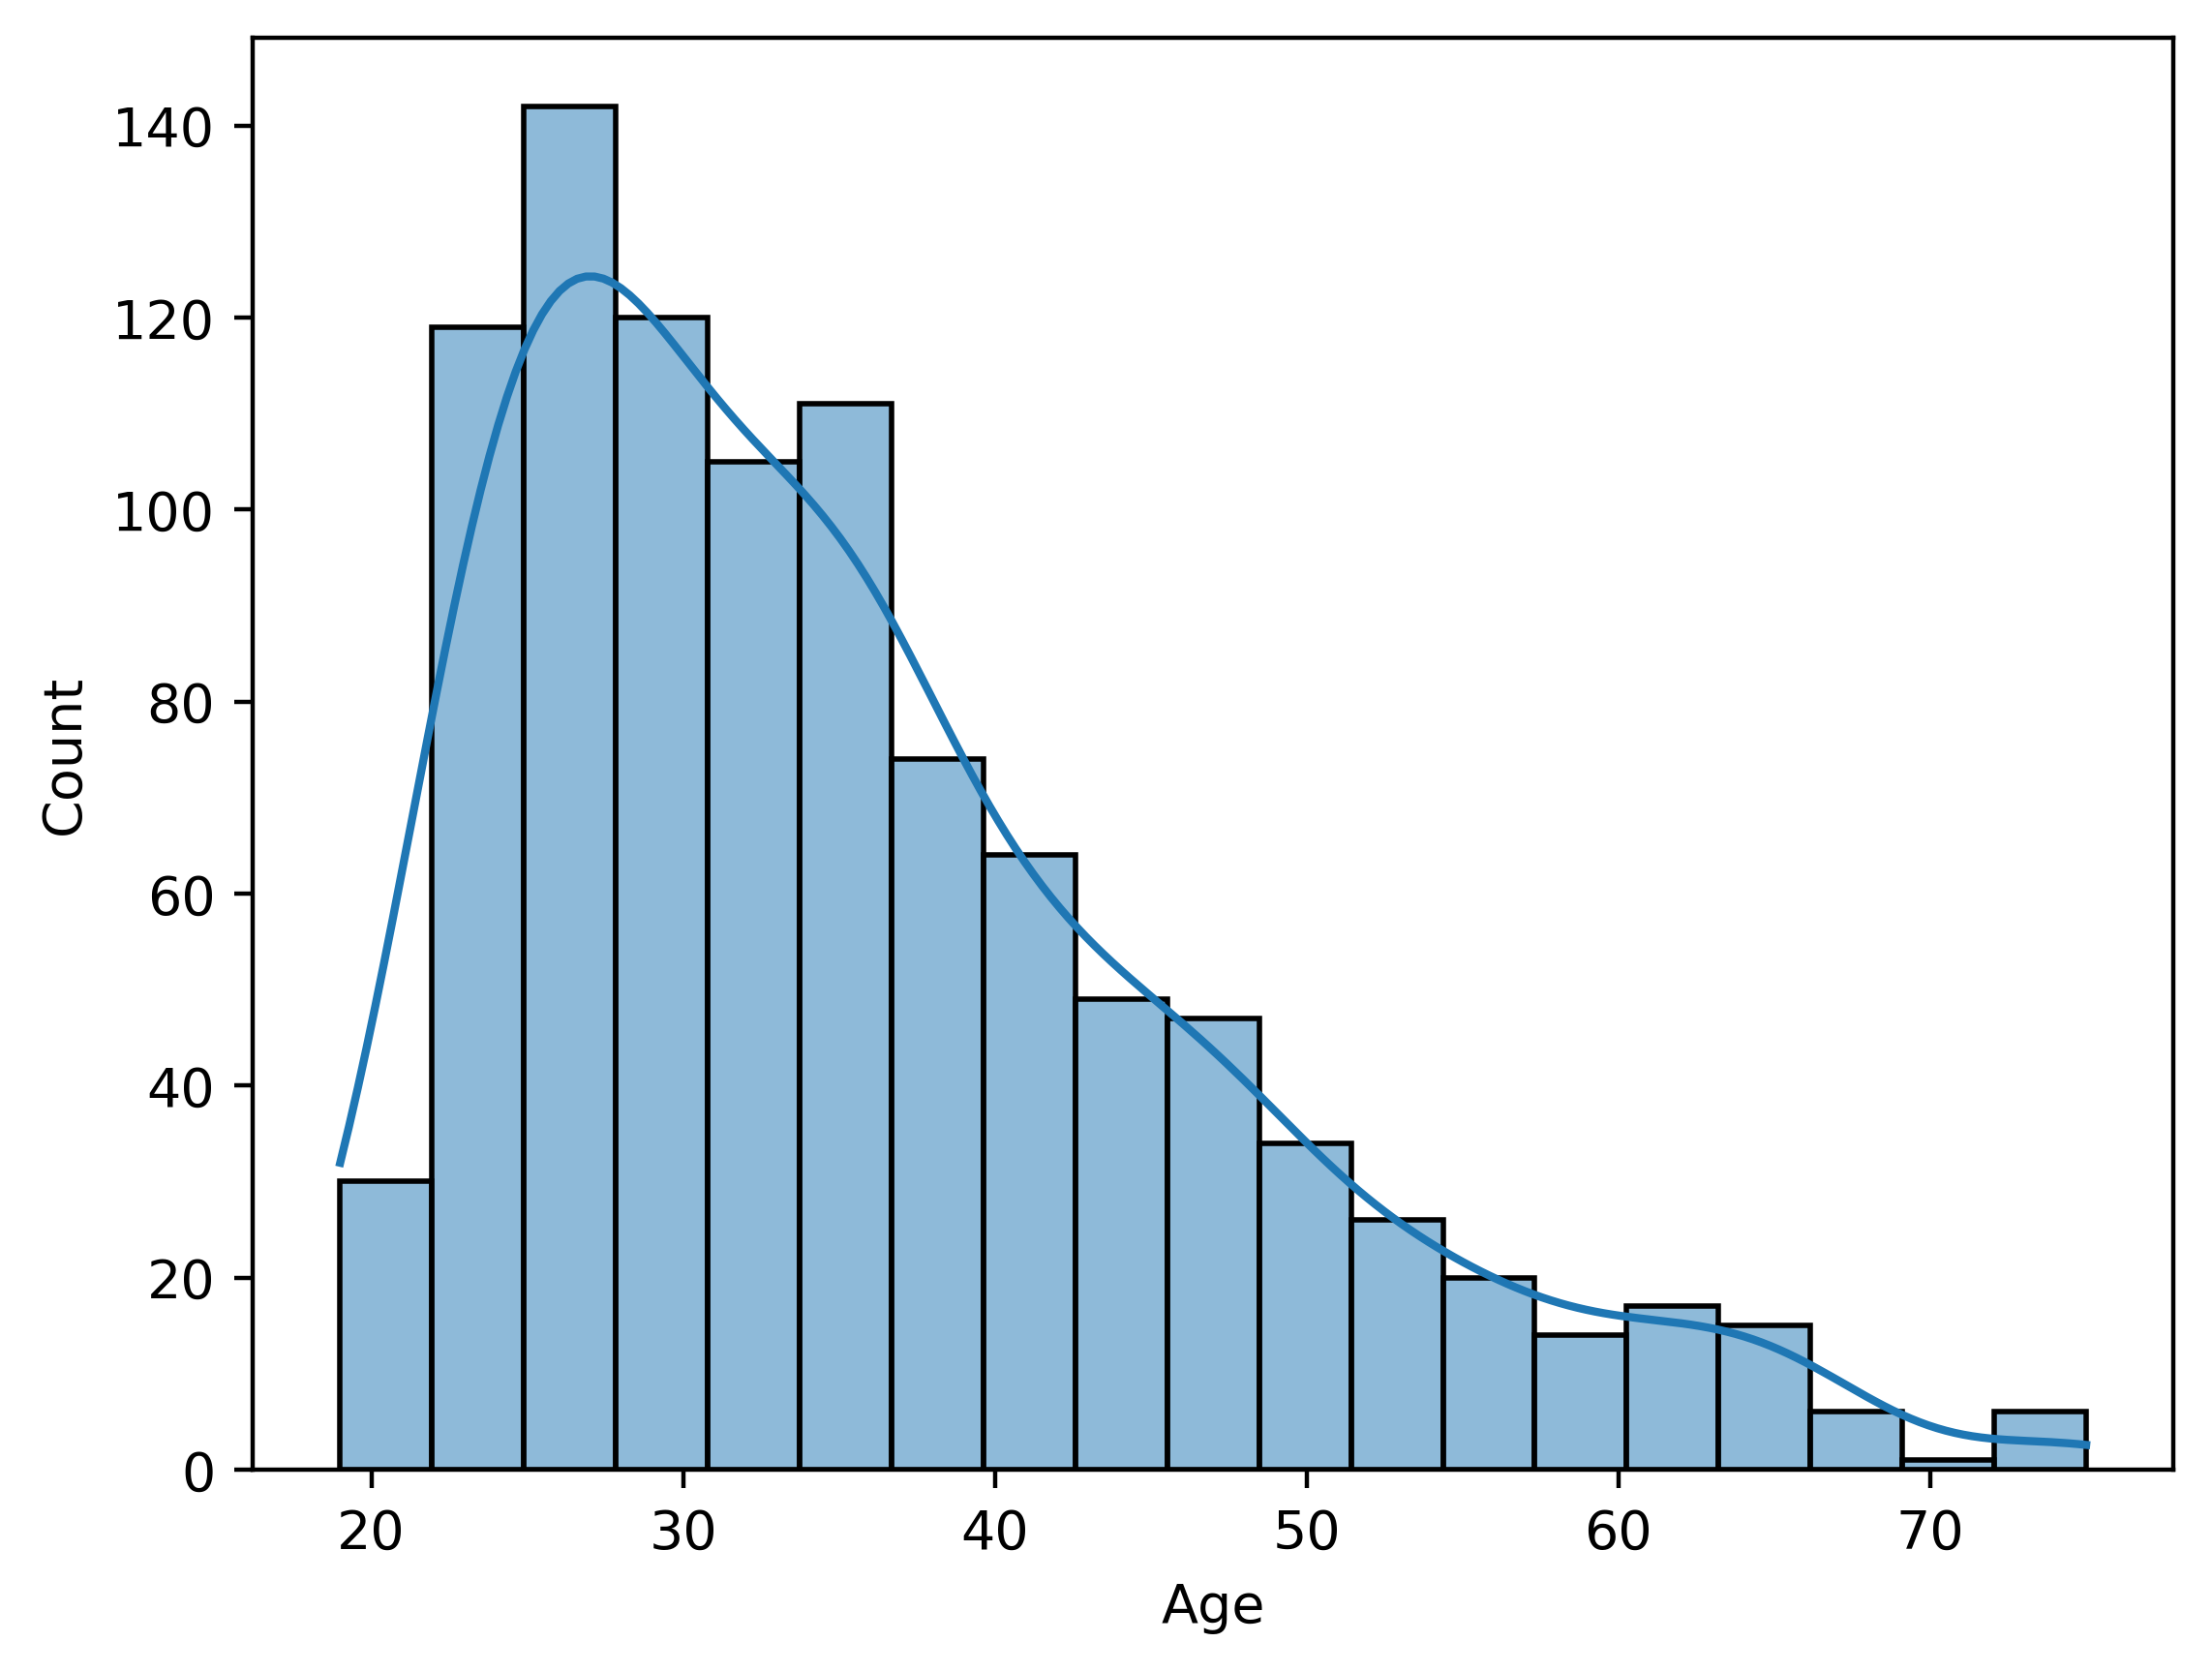

In [73]:
sns.histplot(data=df, x='Age', kde=True)
plt.show()

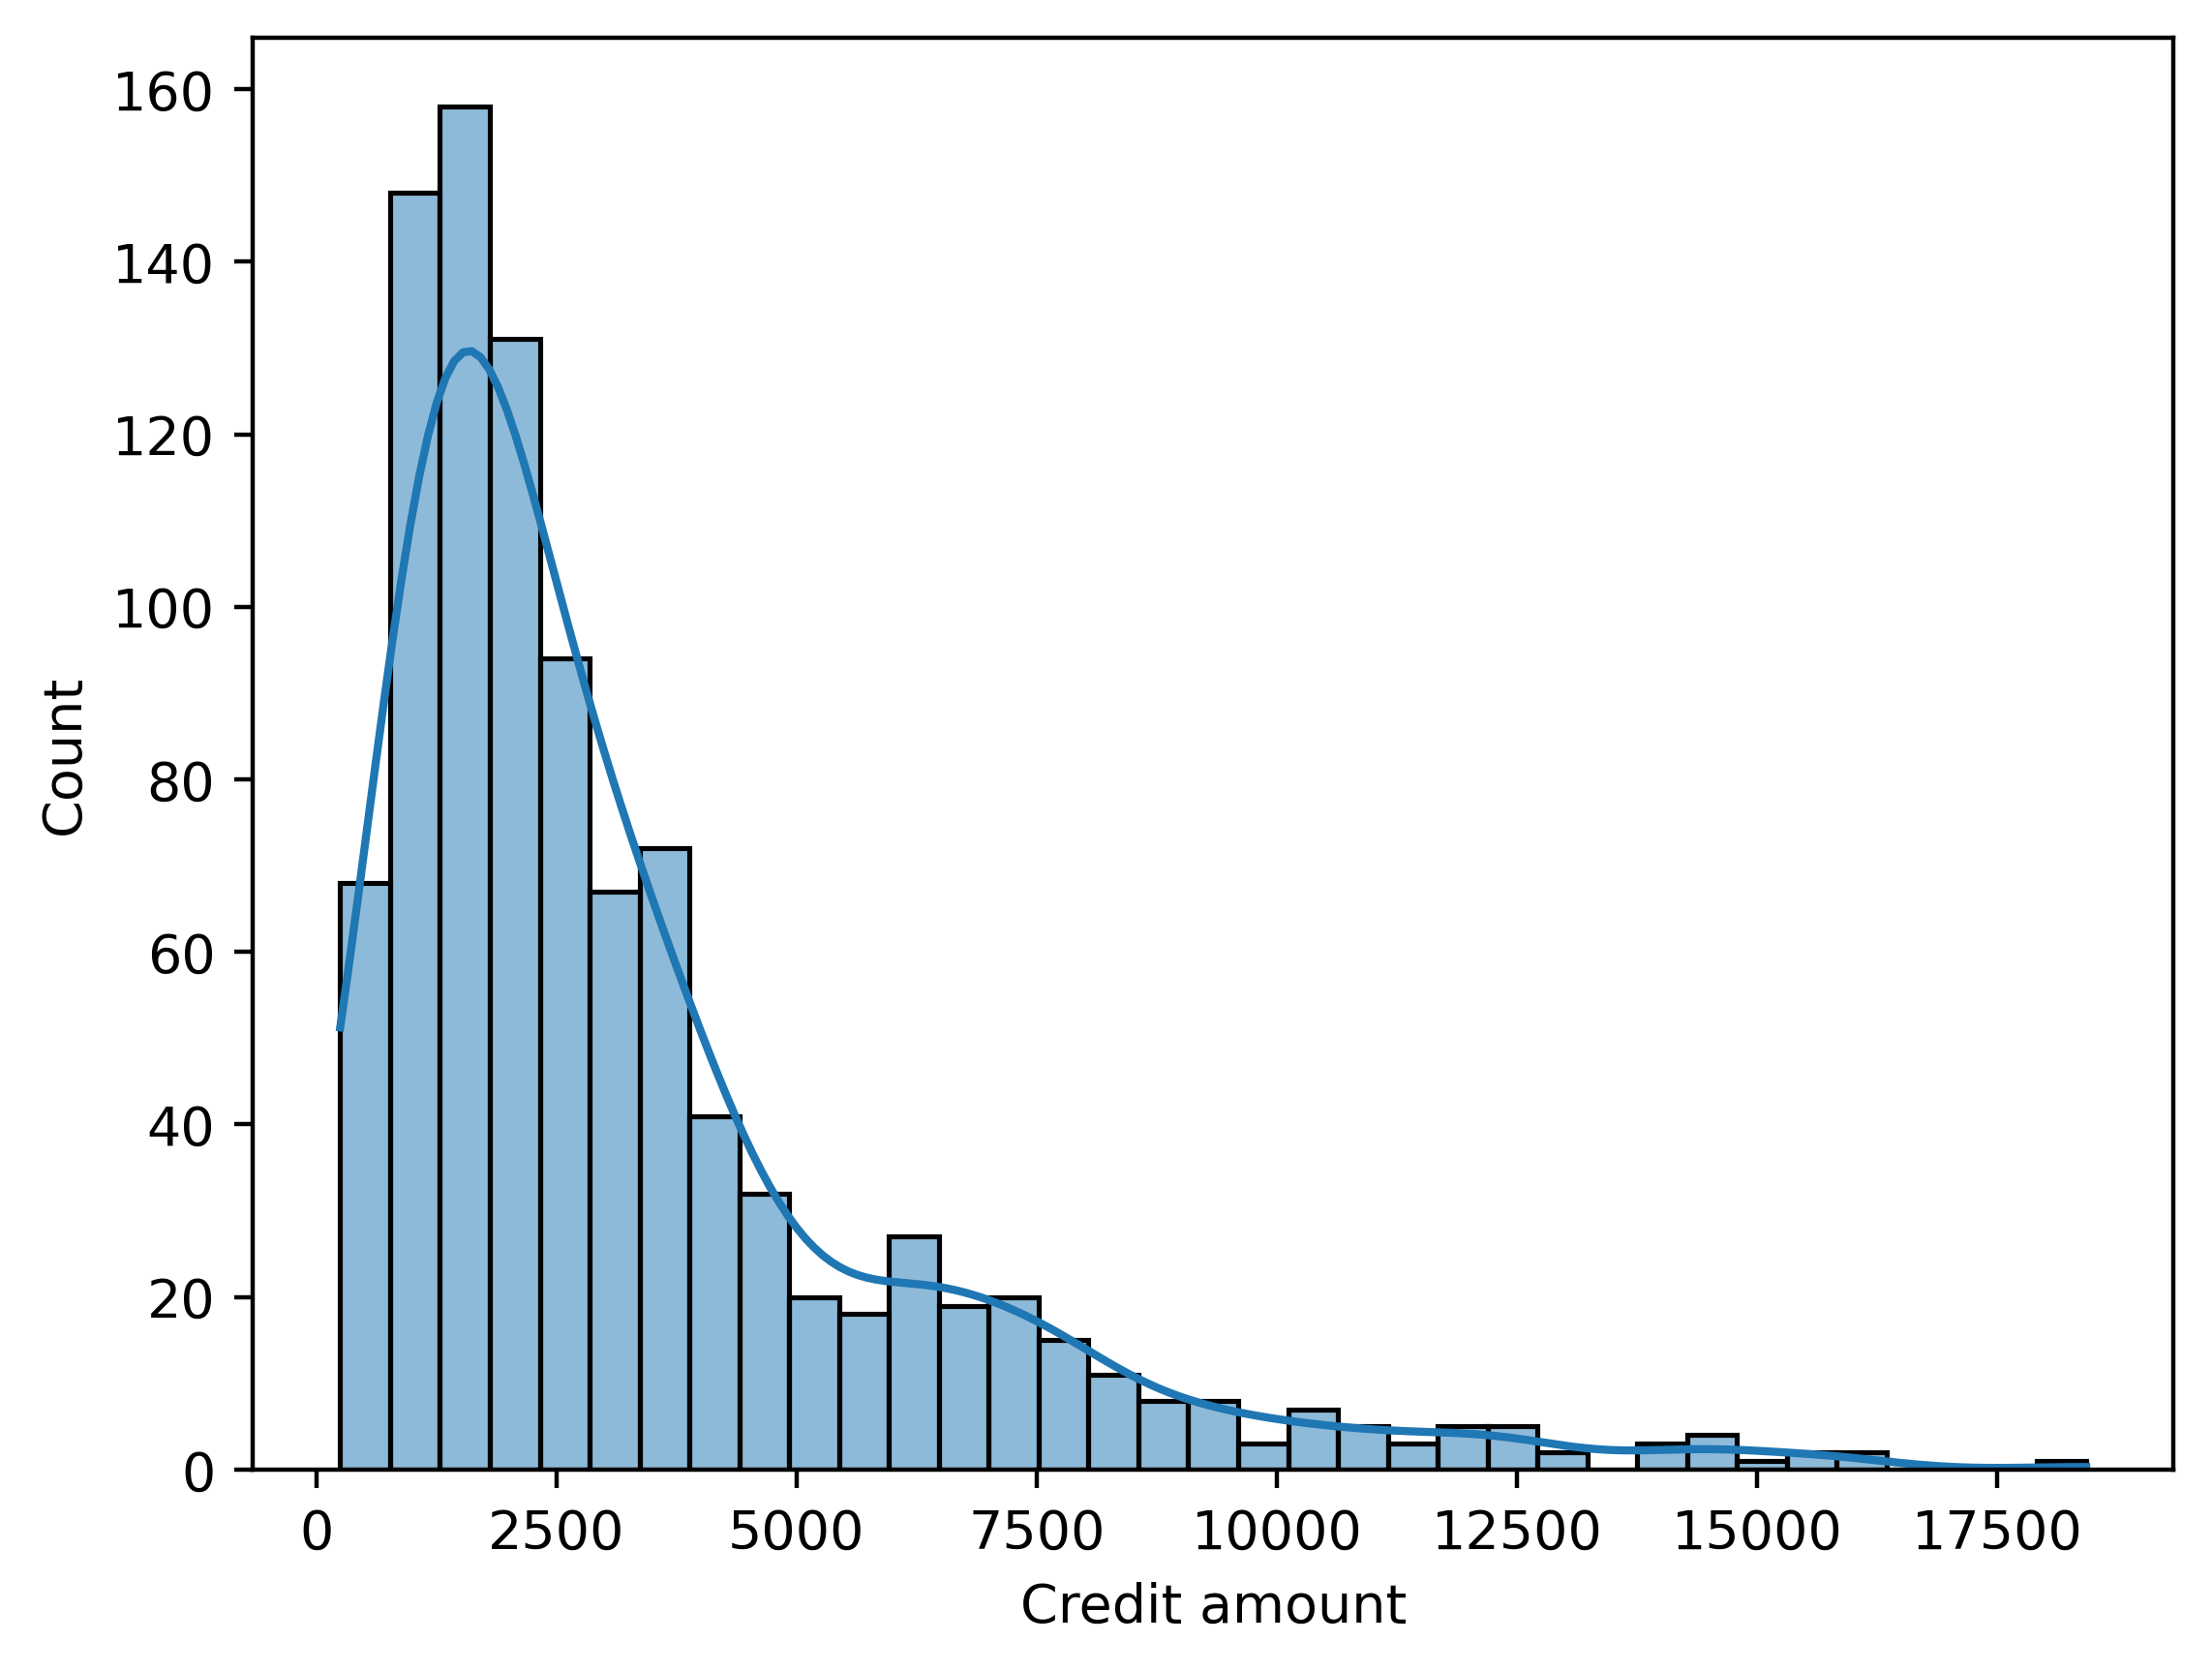

In [74]:
sns.histplot(data=df, x='Credit amount', kde=True)
plt.show()

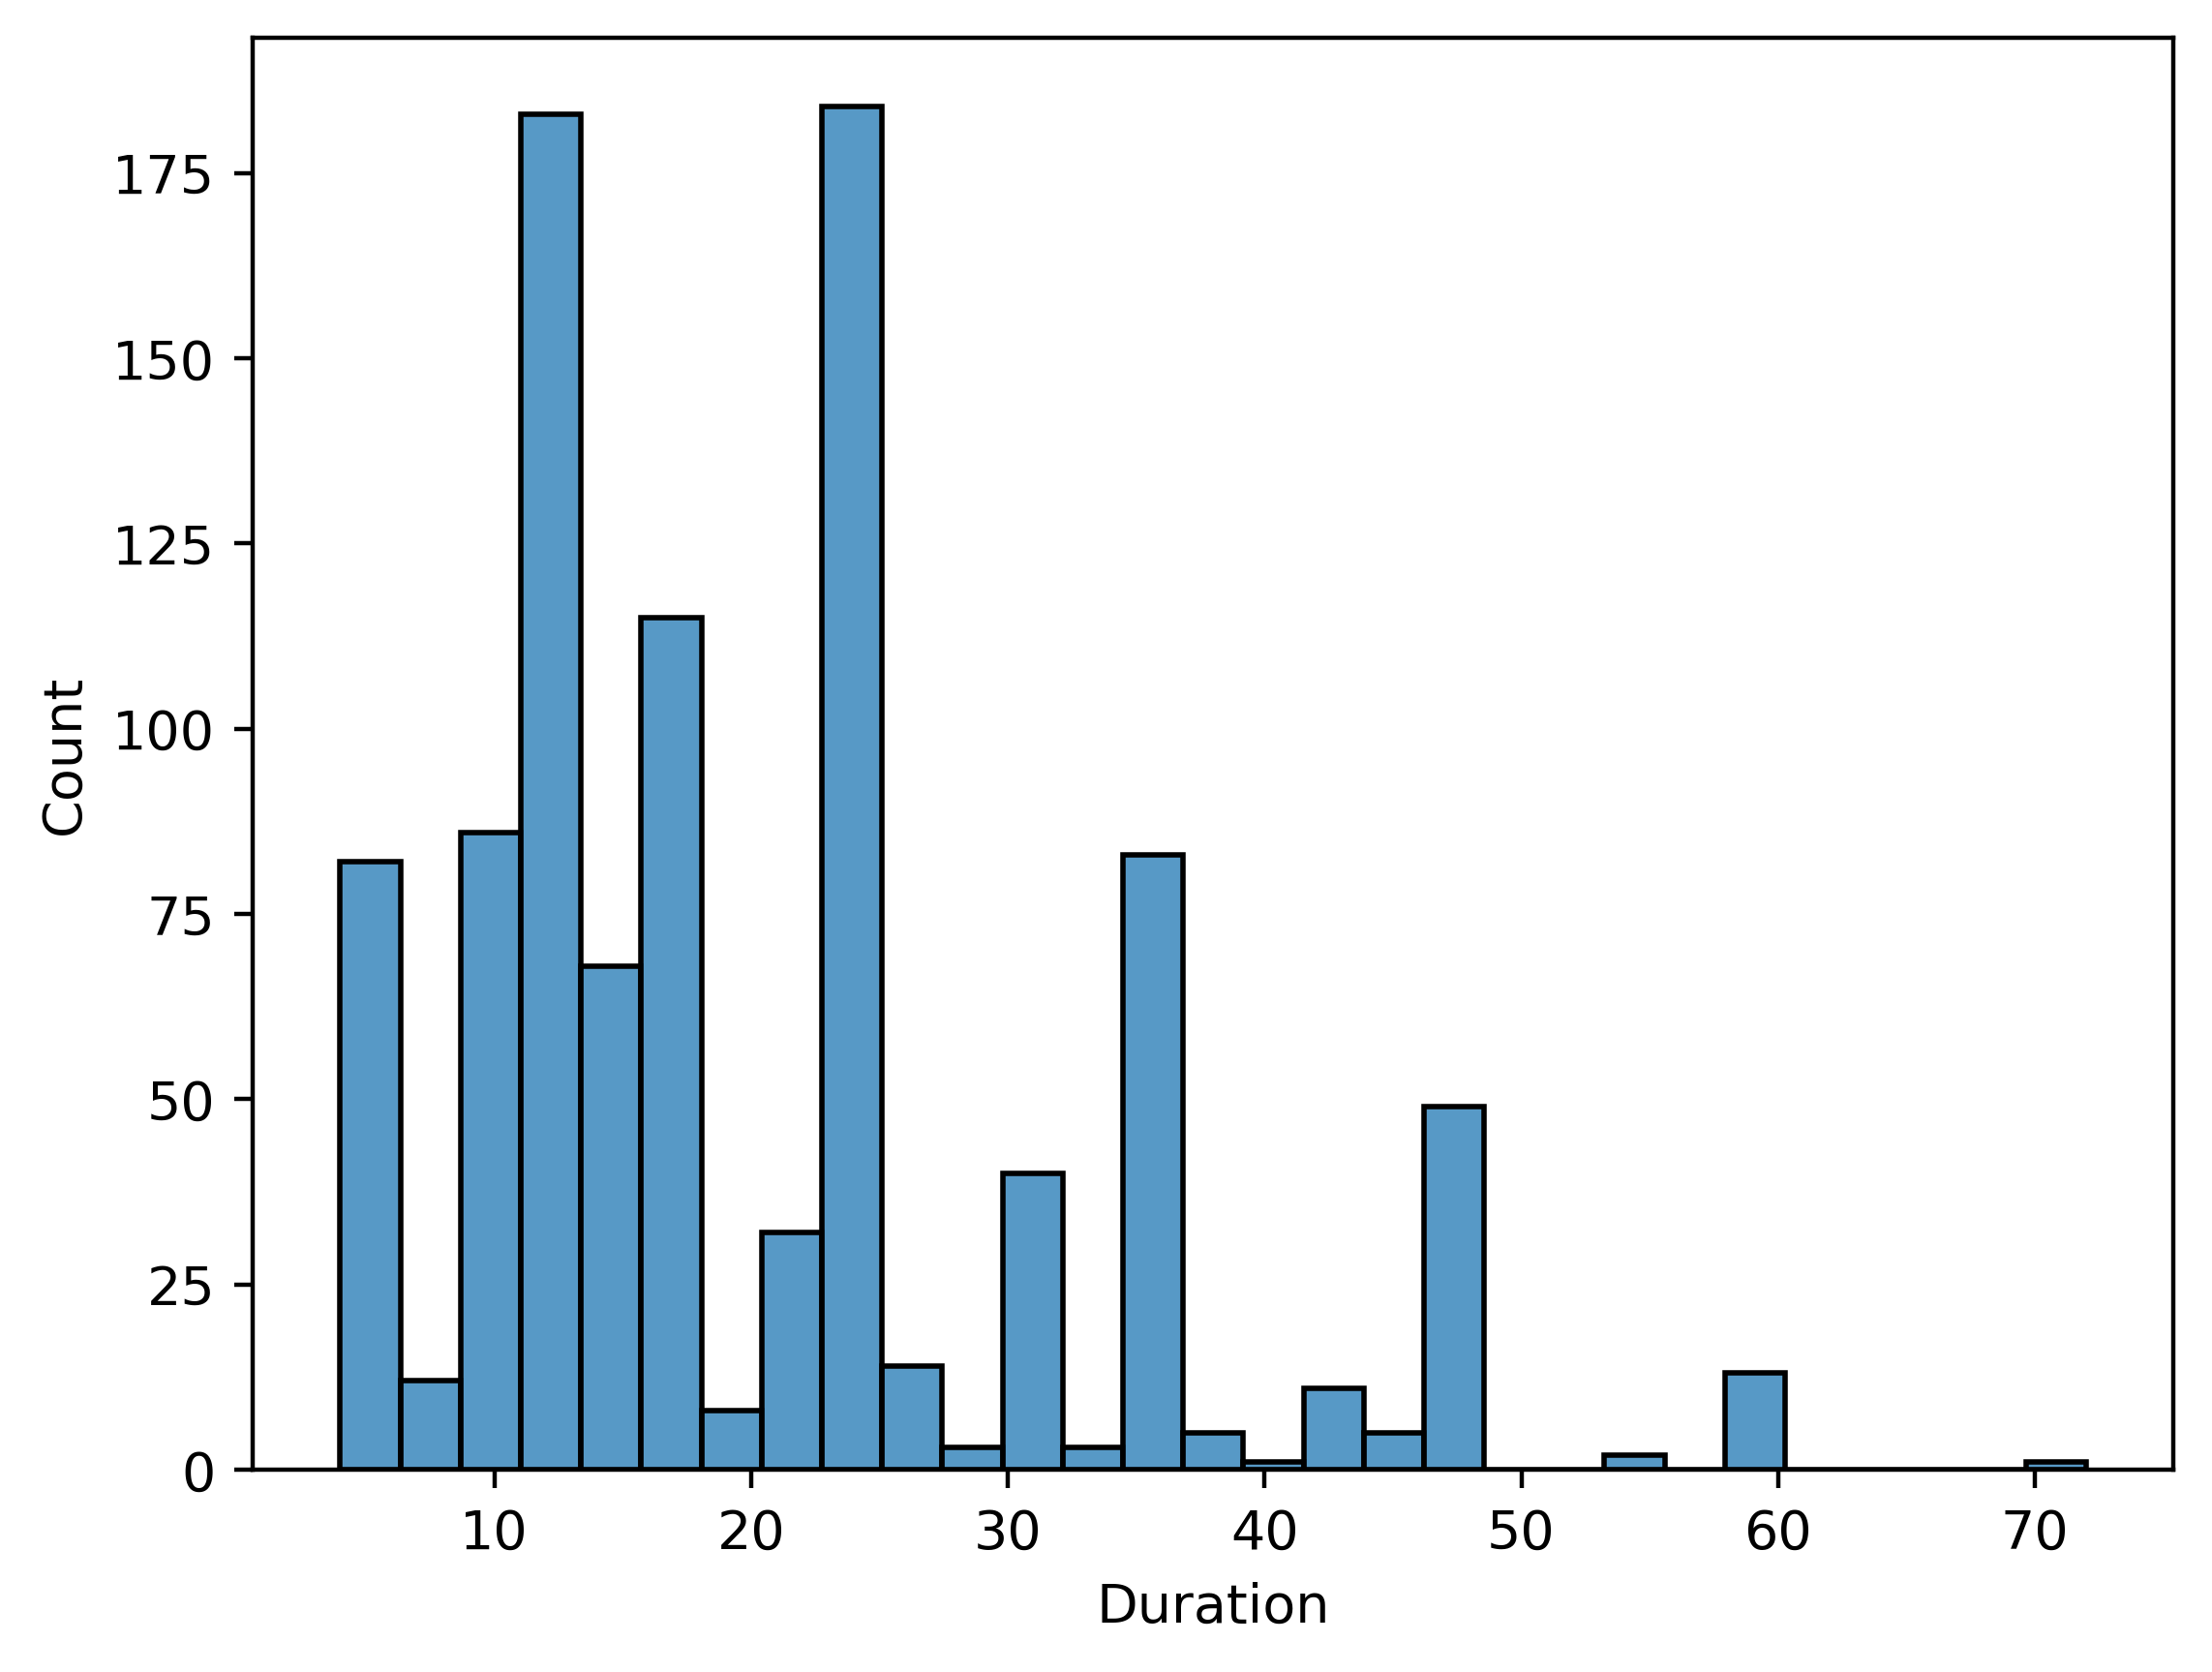

In [75]:
sns.histplot(data=df, x='Duration')
plt.show()

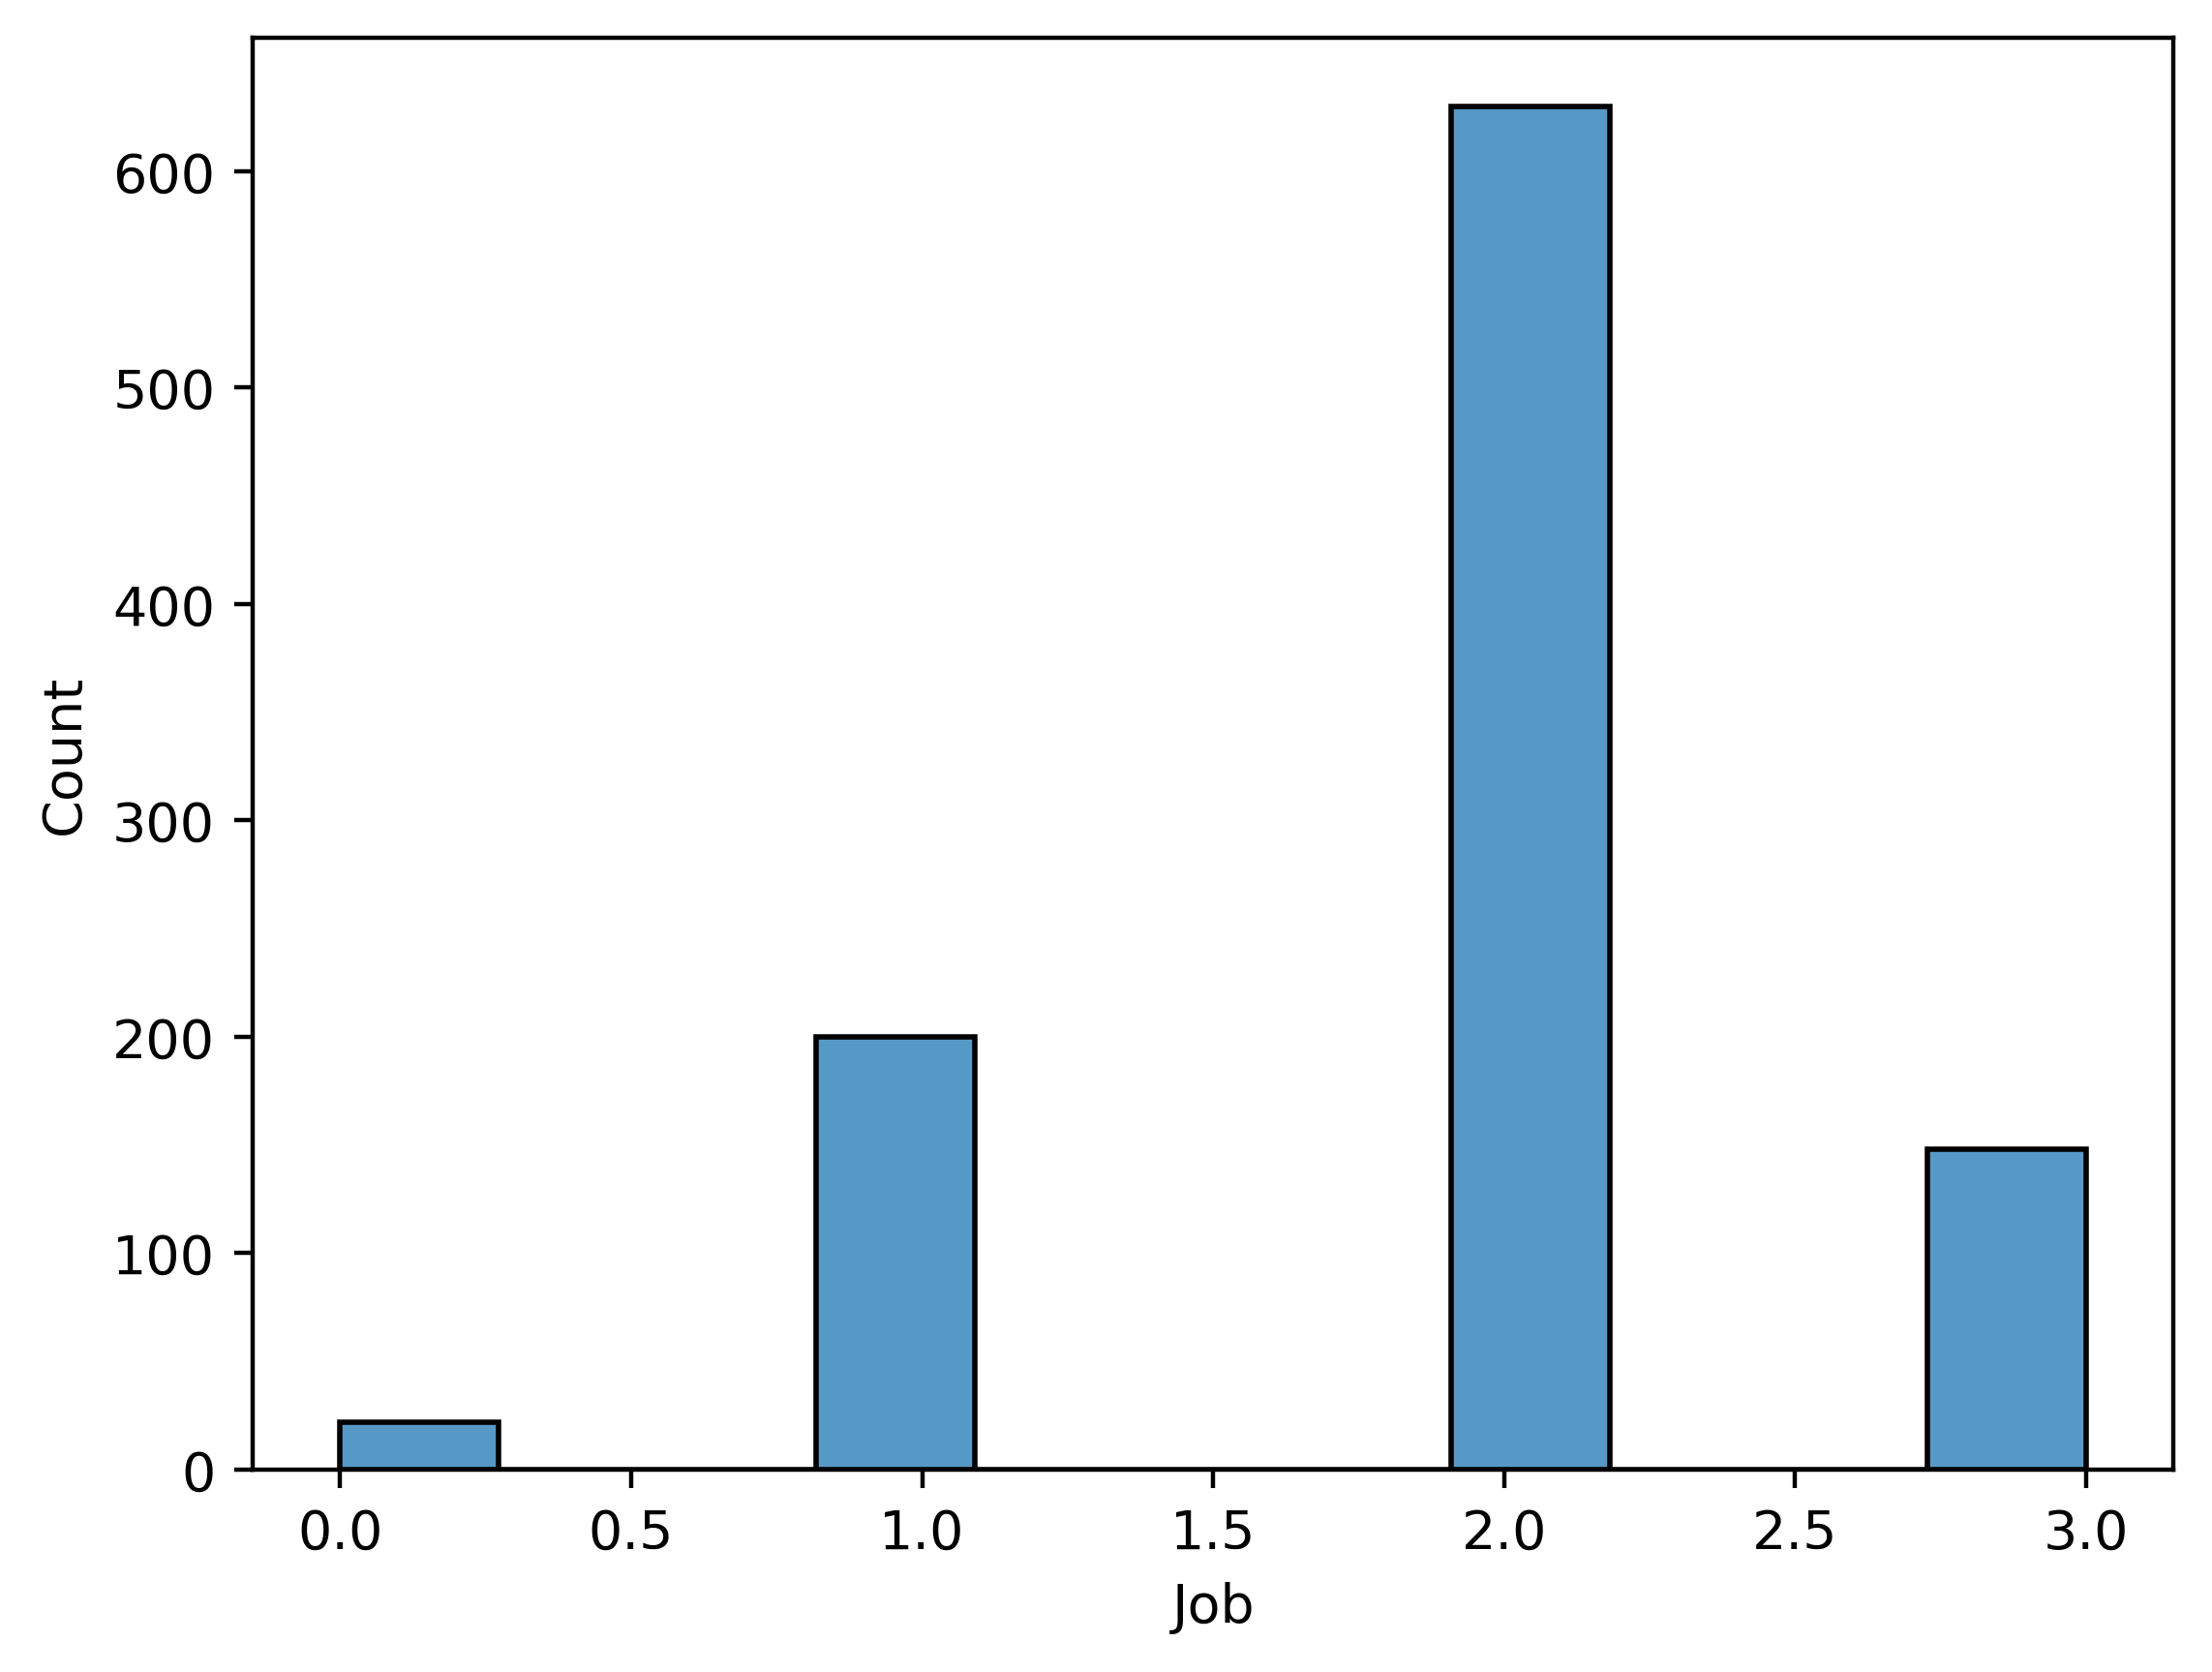

In [76]:
sns.histplot(data=df, x='Job')
plt.show()

#  Categorical attributes

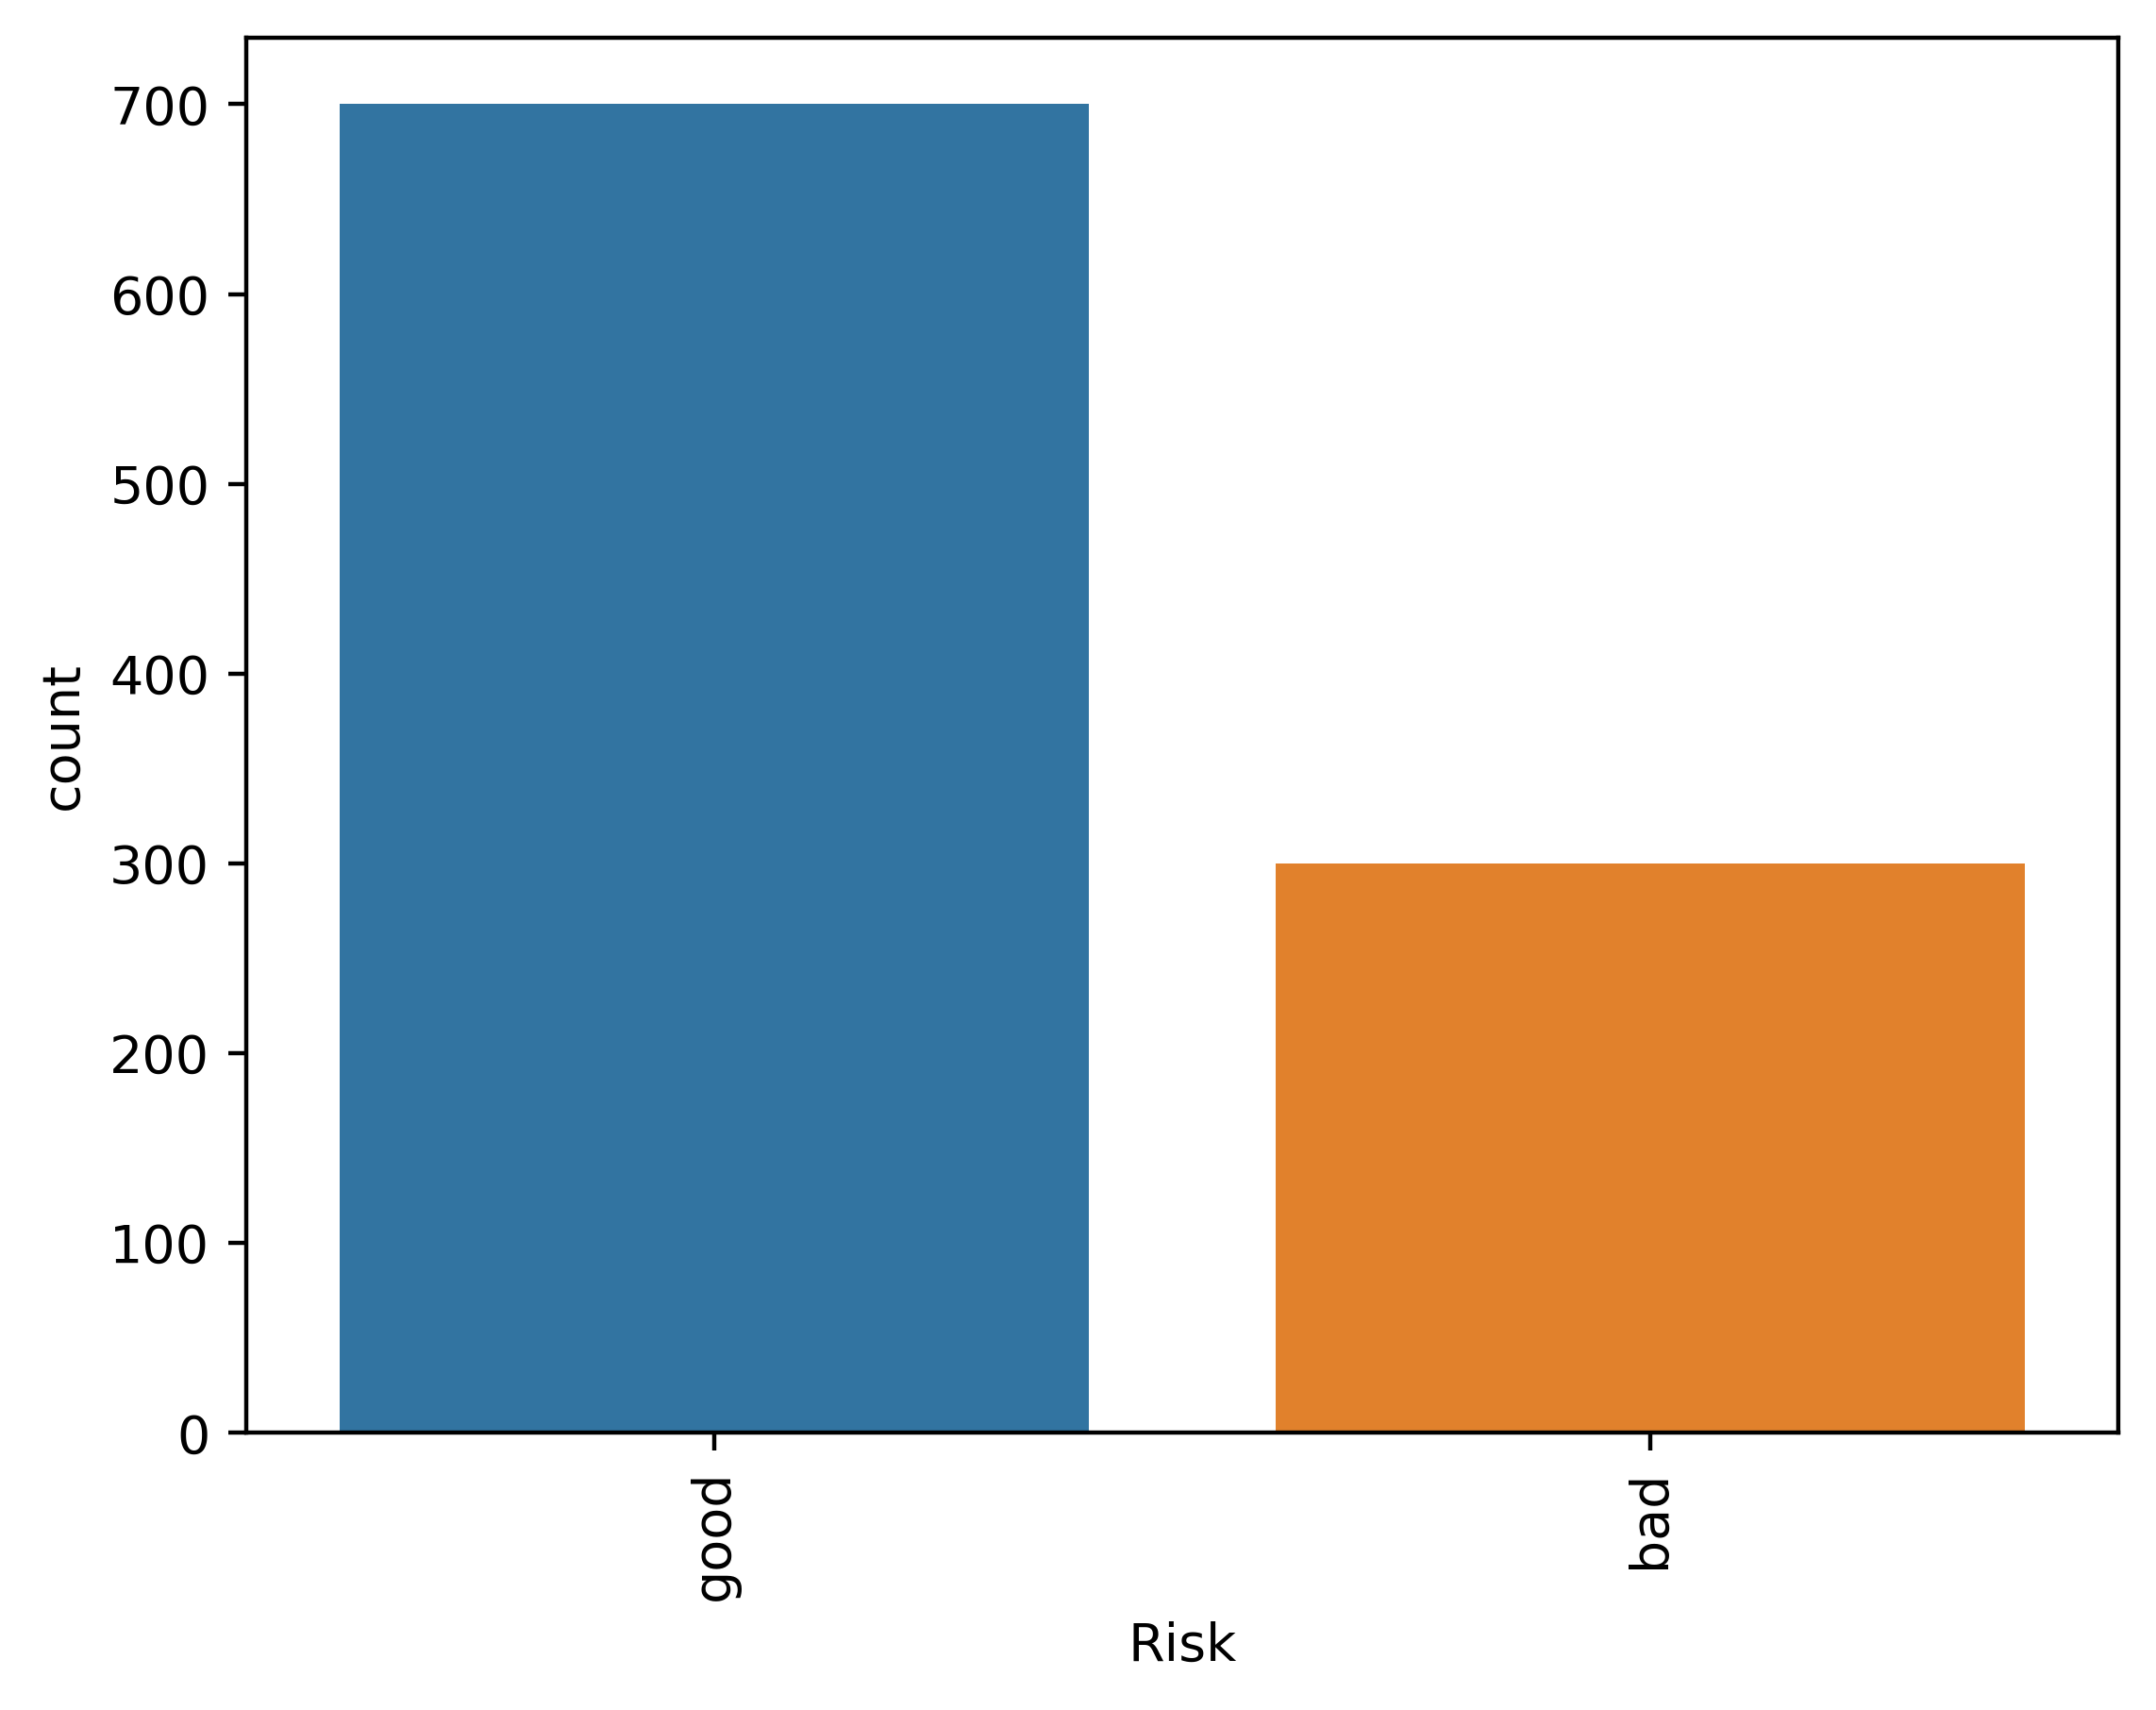

In [77]:
sns.countplot(data=df, x='Risk')
plt.xticks(rotation='vertical')
plt.show()

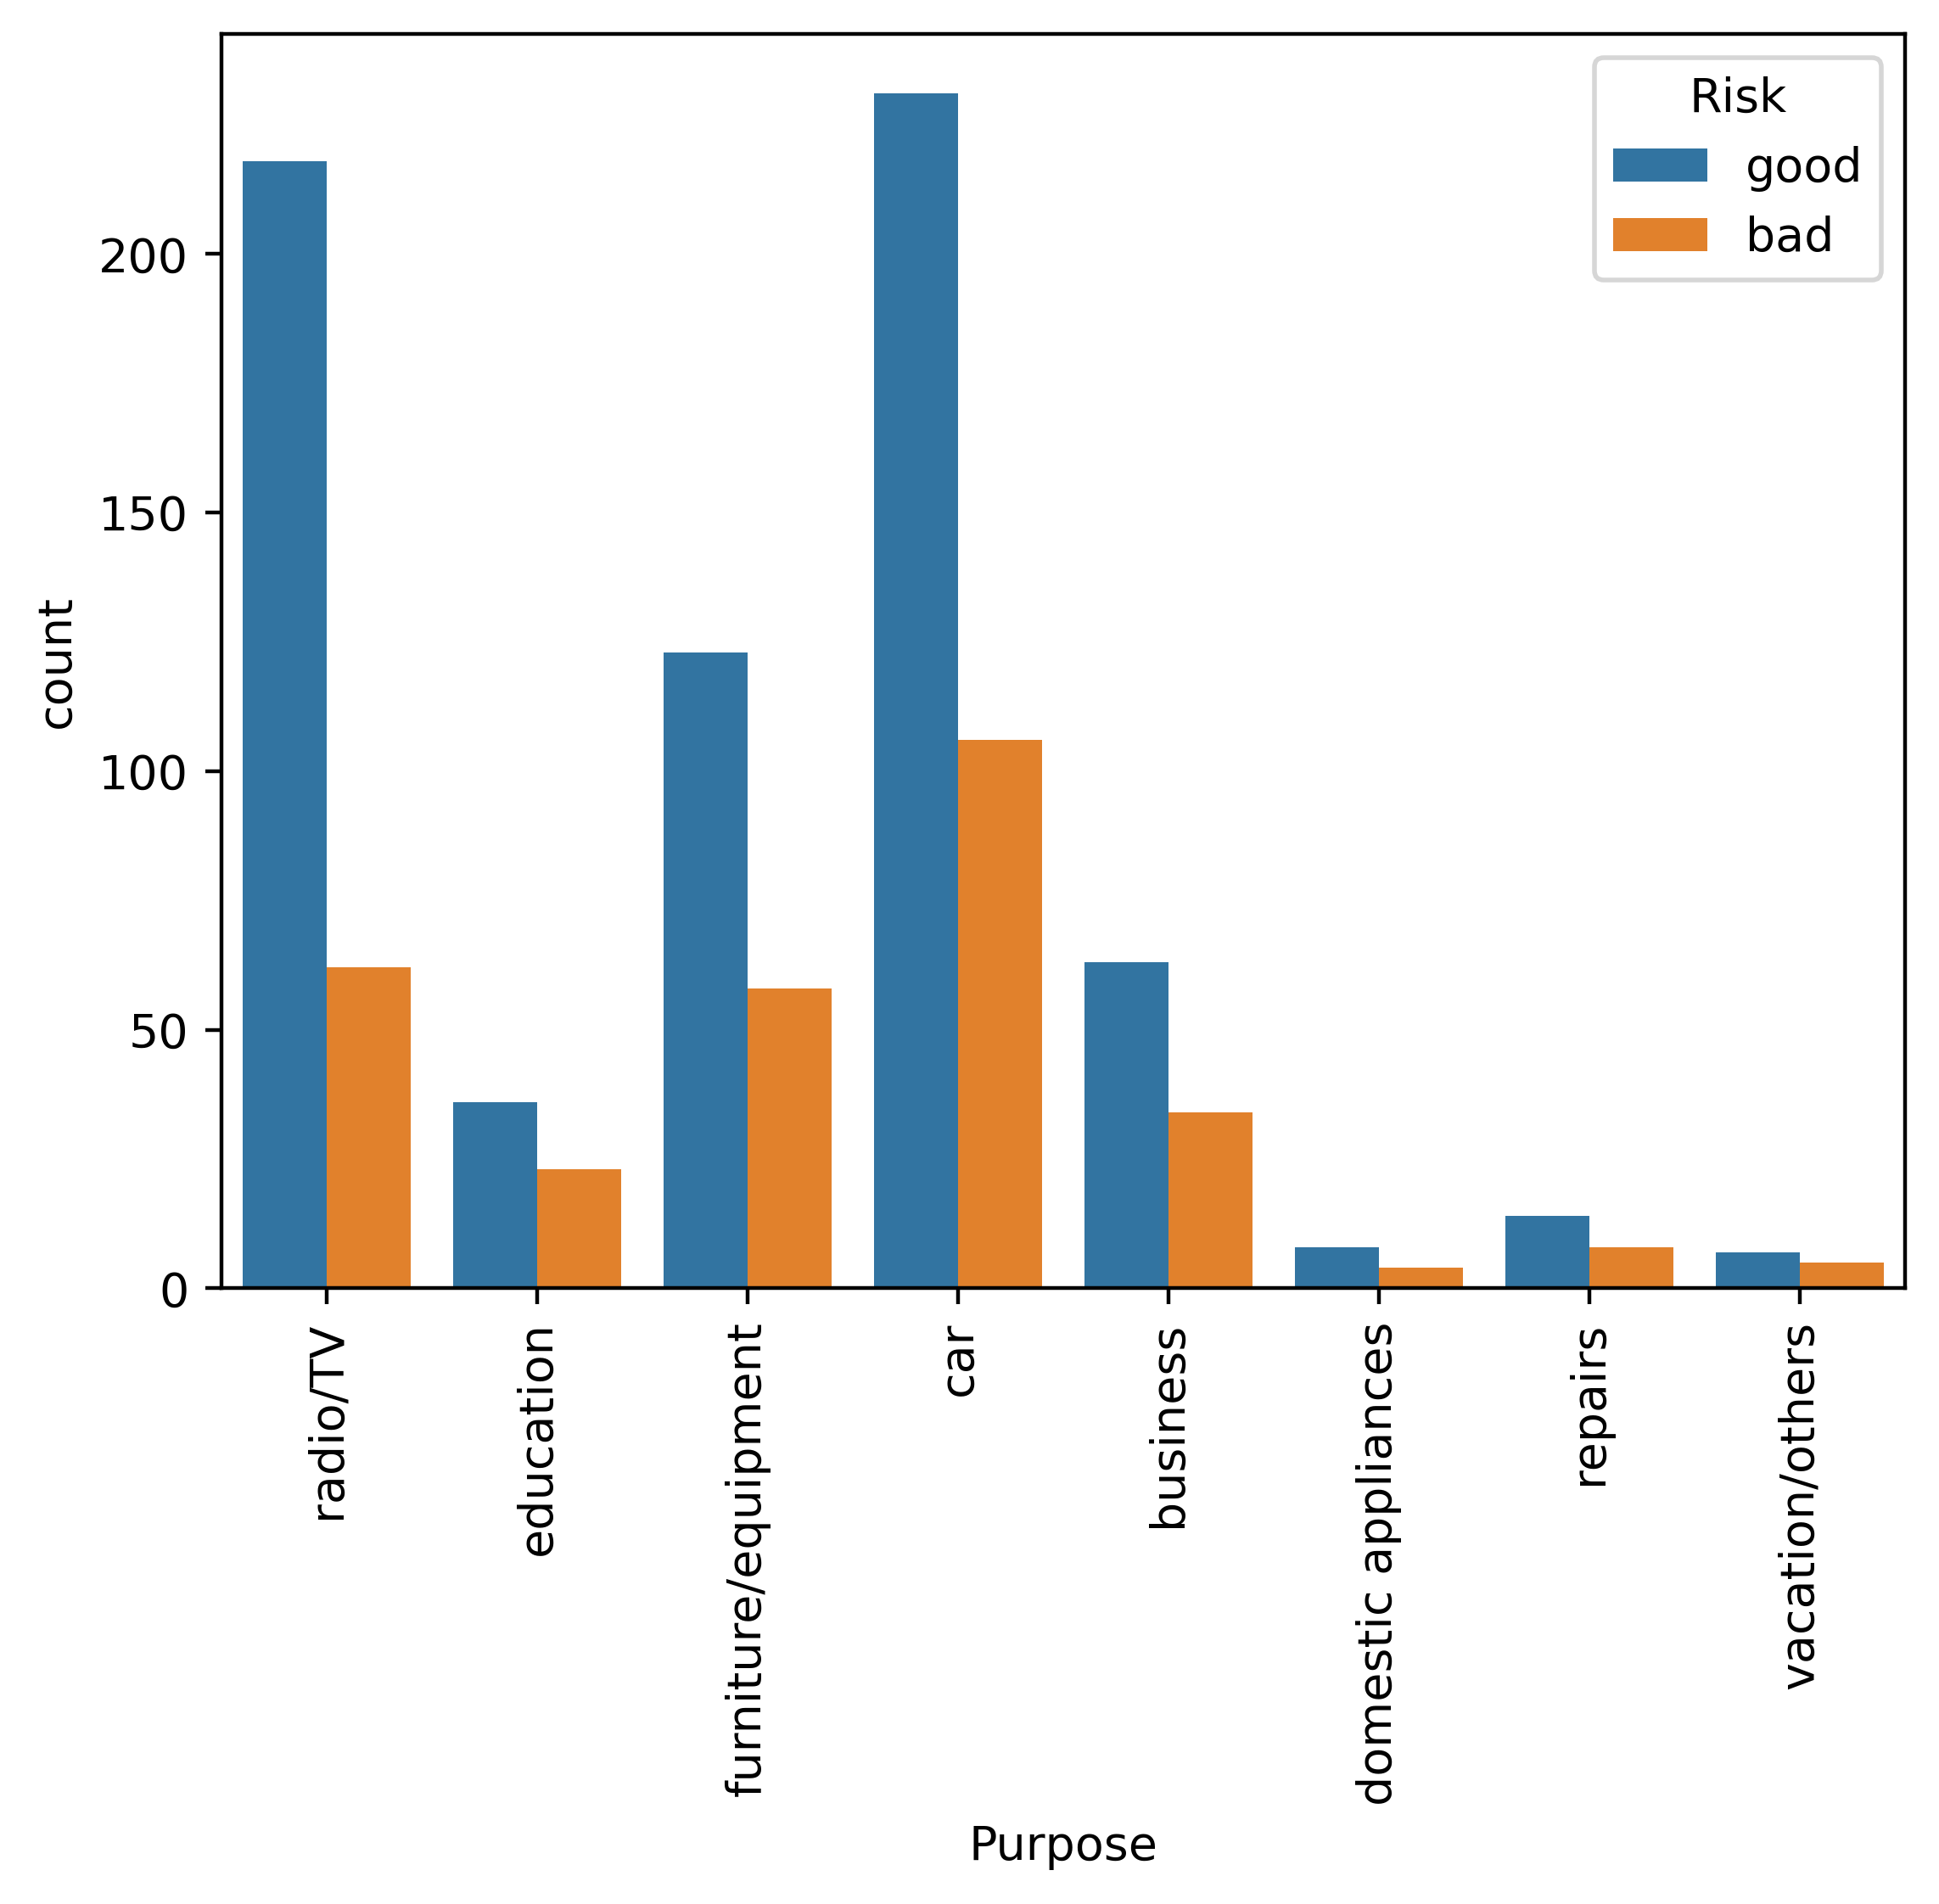

In [100]:
sns.countplot(data=df, x='Purpose', hue = 'Risk')
plt.xticks(rotation='vertical')
plt.show()

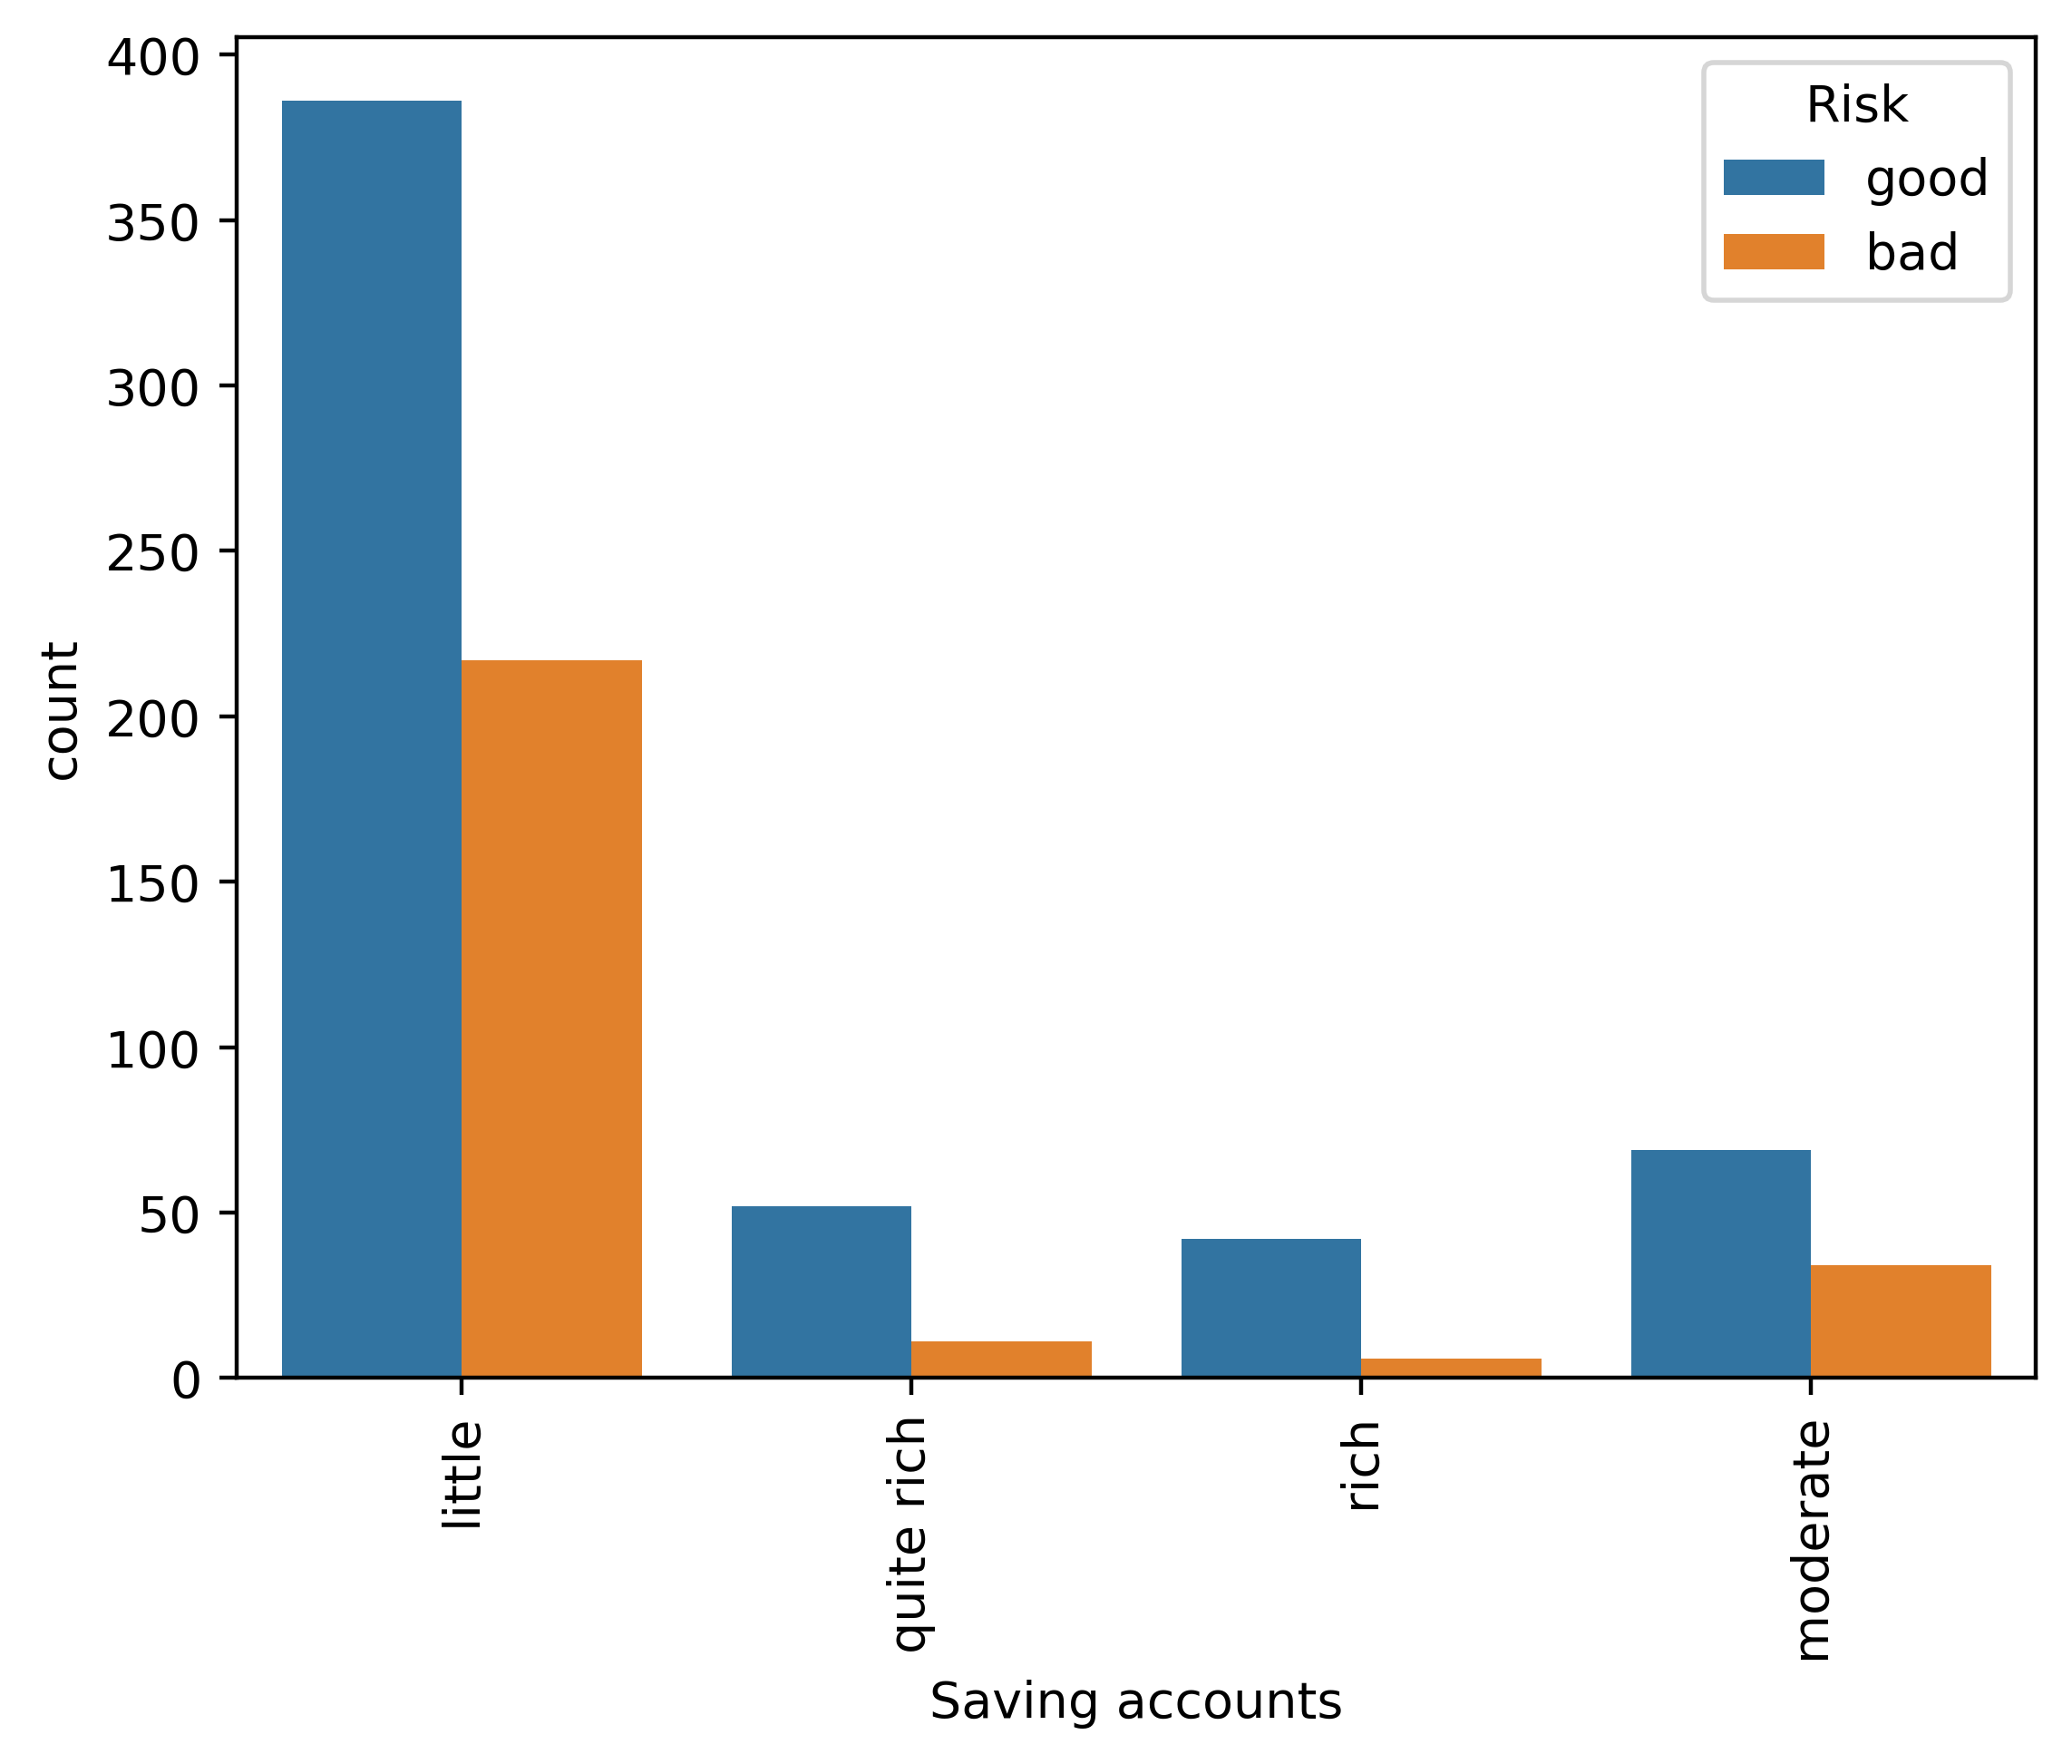

In [101]:
sns.countplot(data=df, x='Saving accounts', hue = 'Risk')
plt.xticks(rotation='vertical')
plt.show()

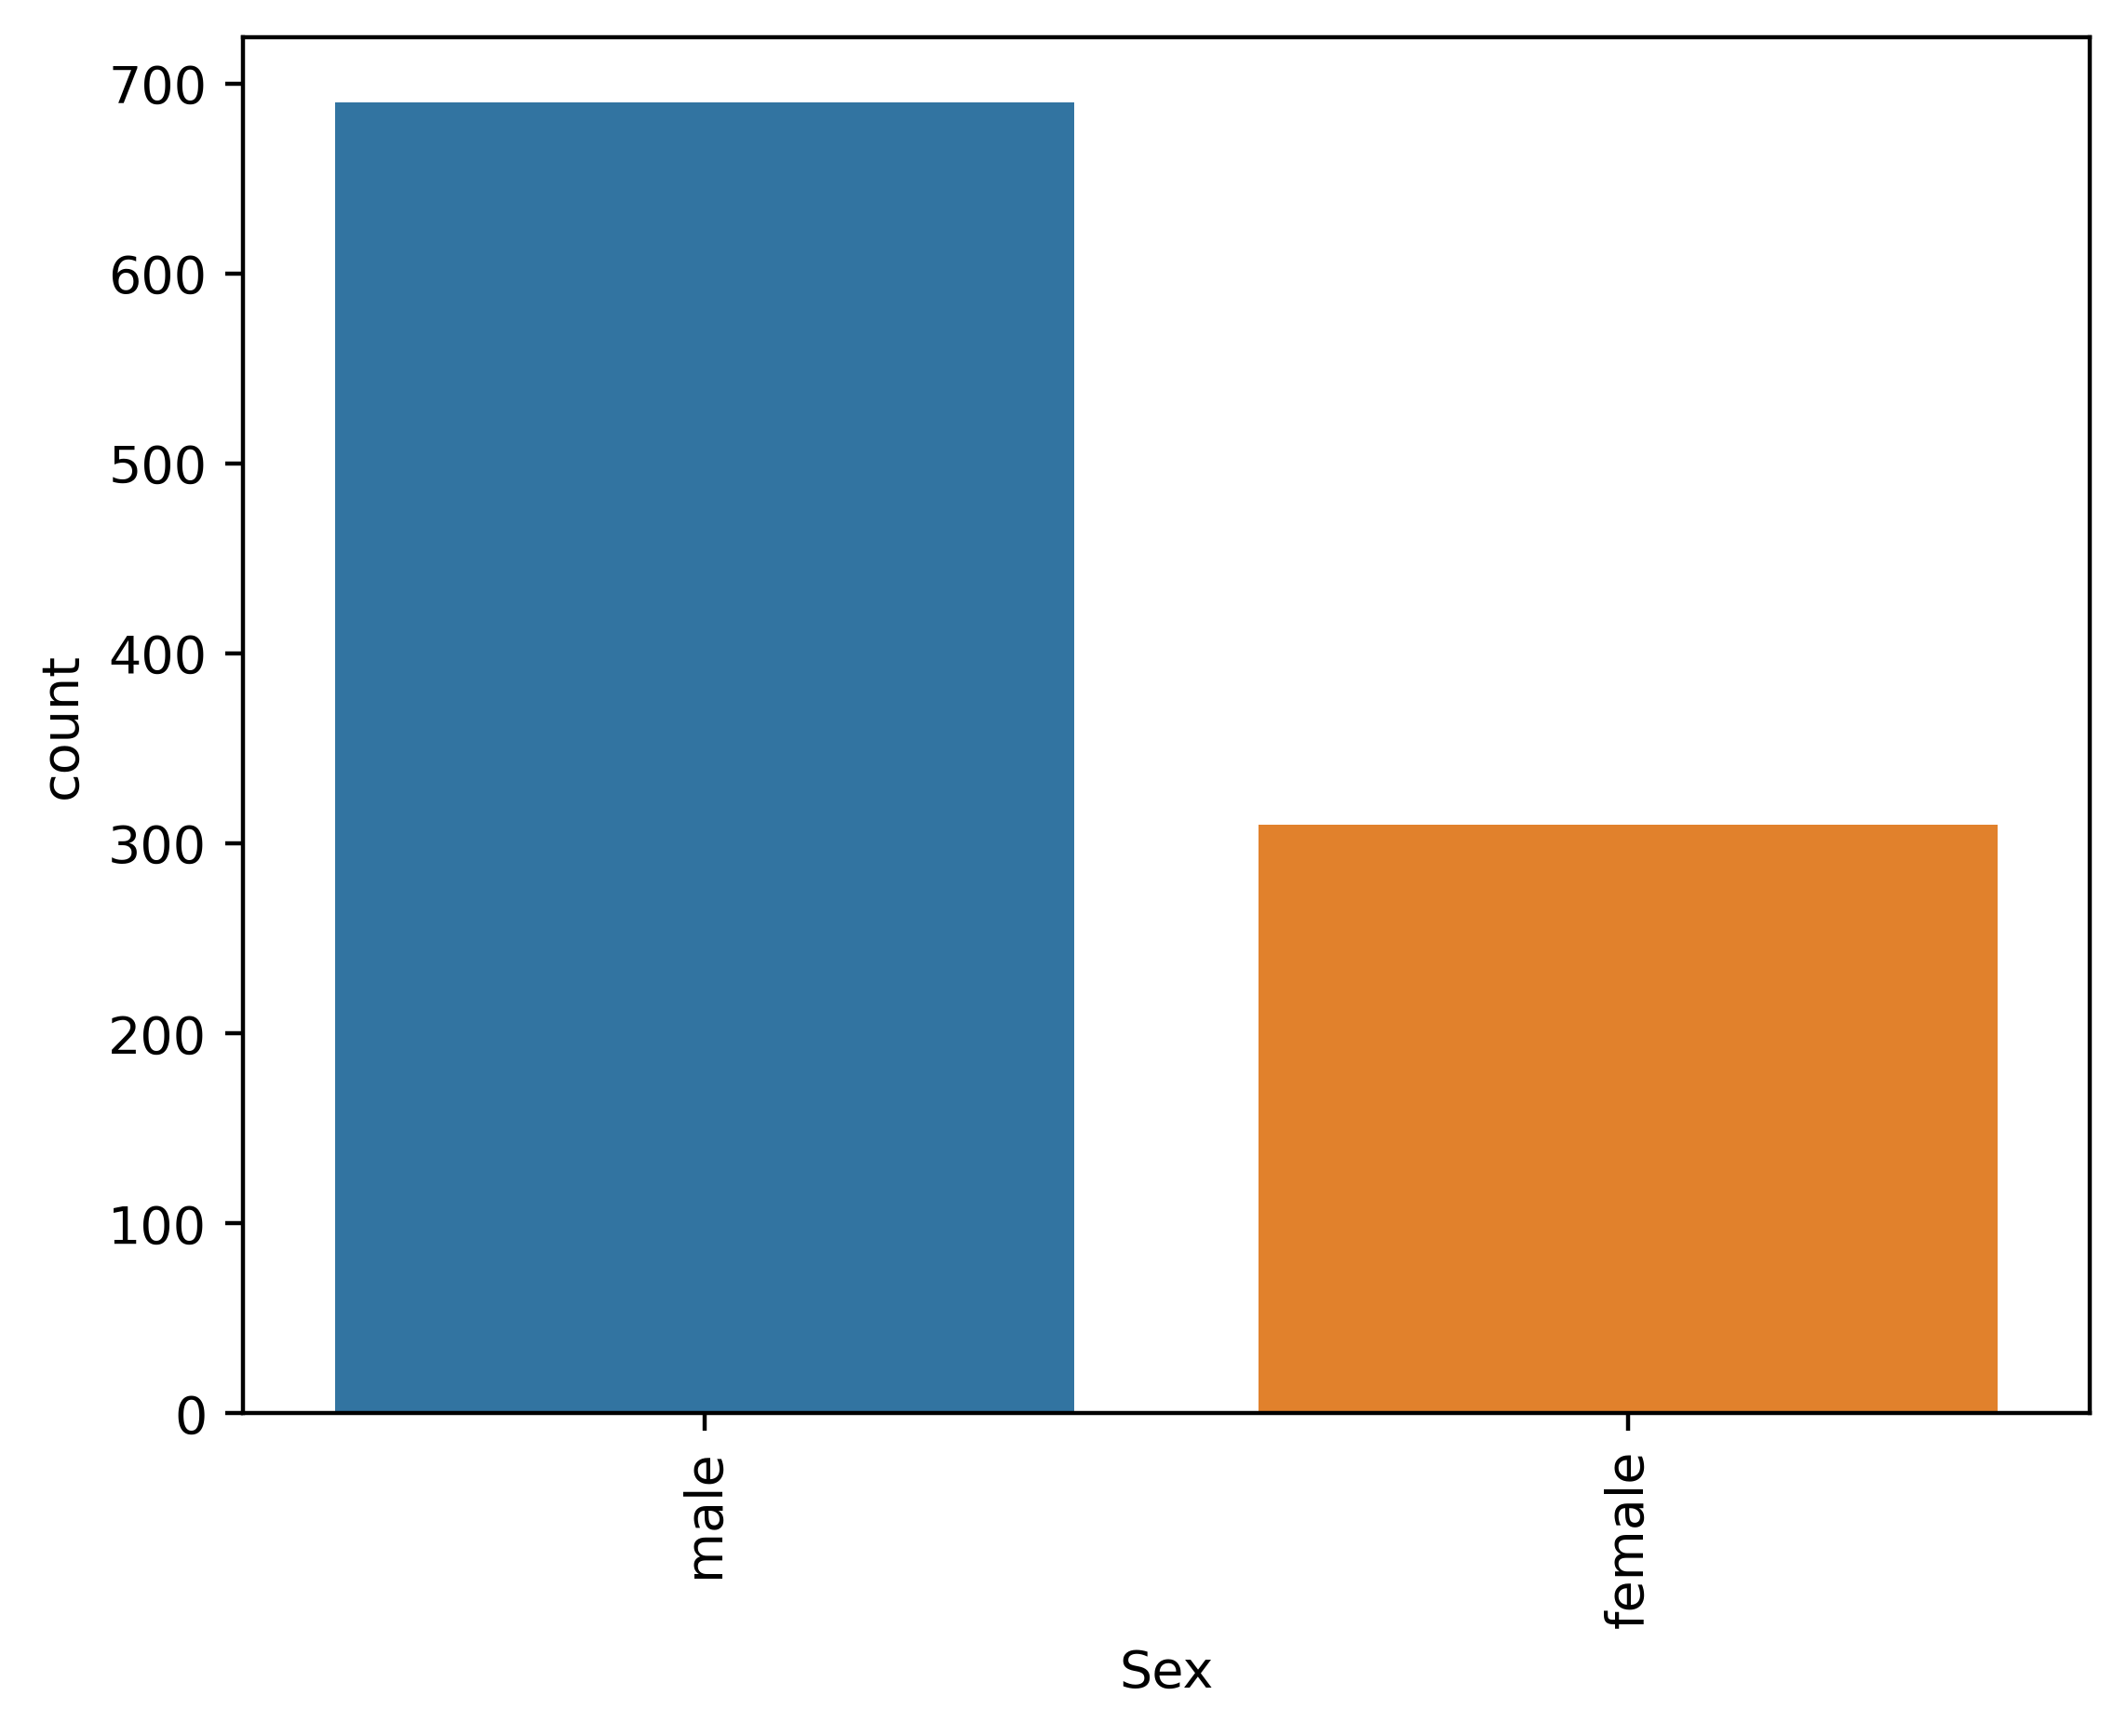

In [80]:
sns.countplot(data=df, x='Sex')
plt.xticks(rotation='vertical')
plt.show()

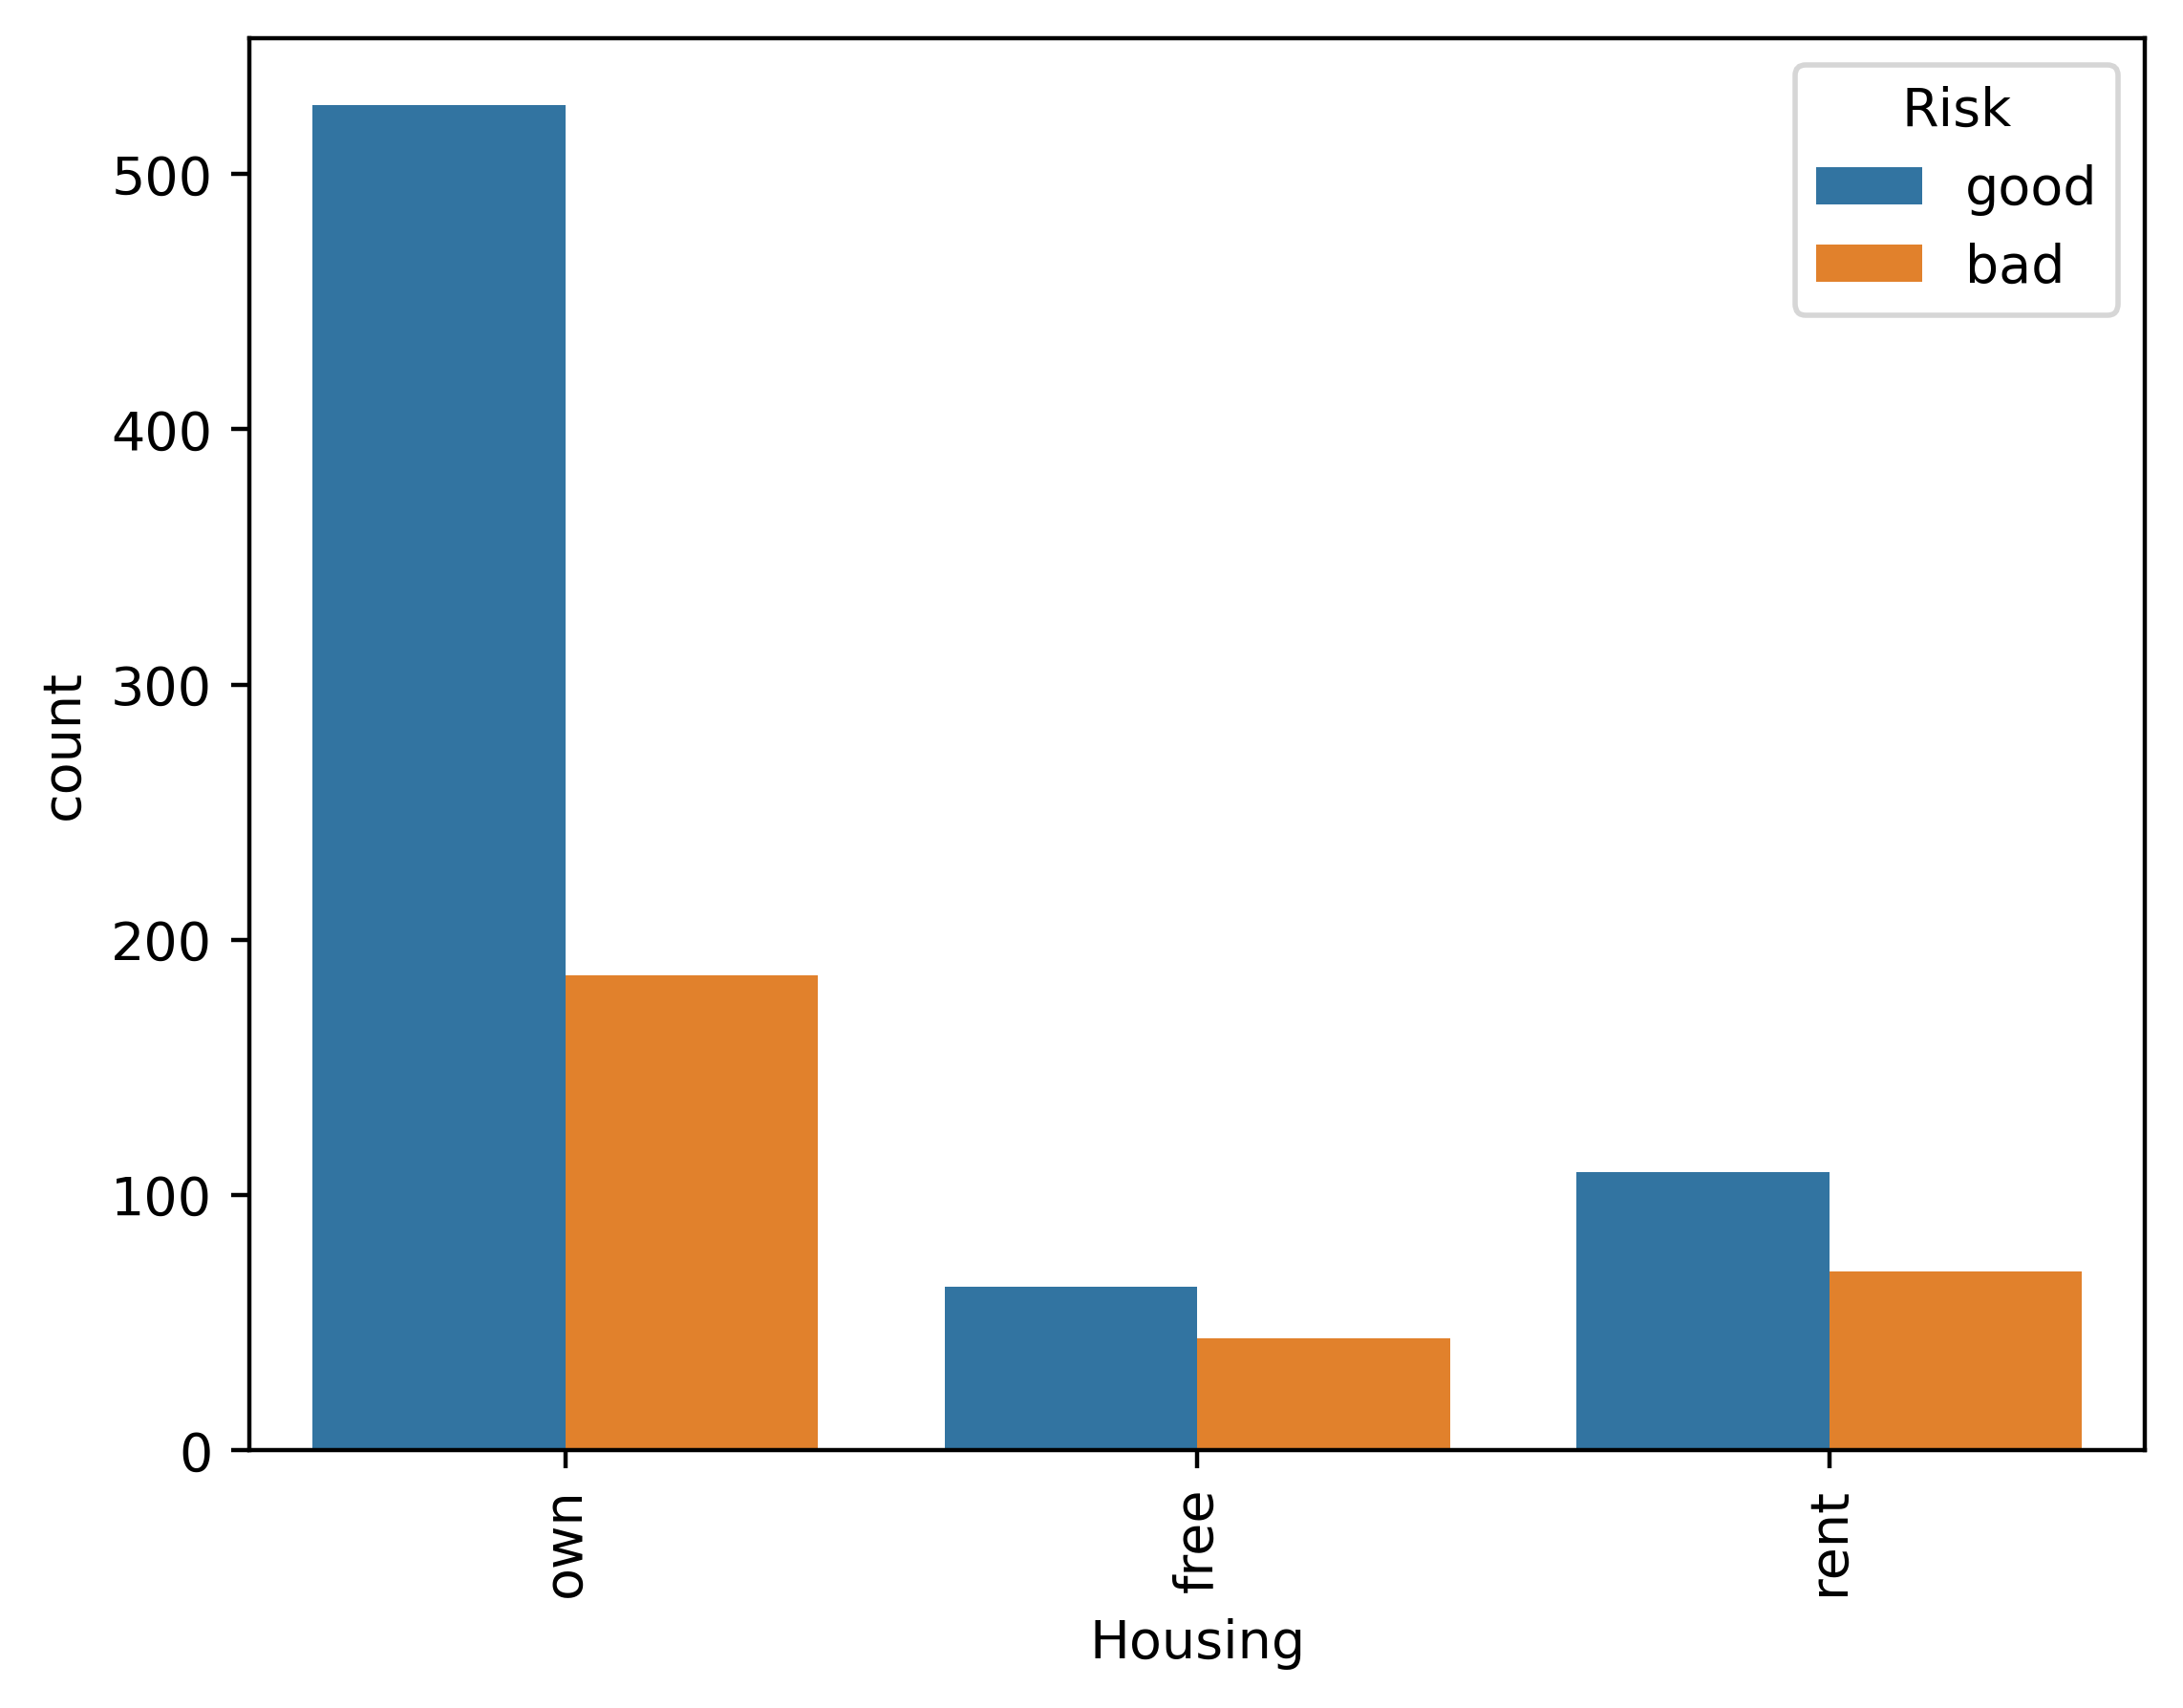

In [102]:

sns.countplot(data=df, x='Housing', hue = 'Risk')
plt.xticks(rotation='vertical')
plt.show()

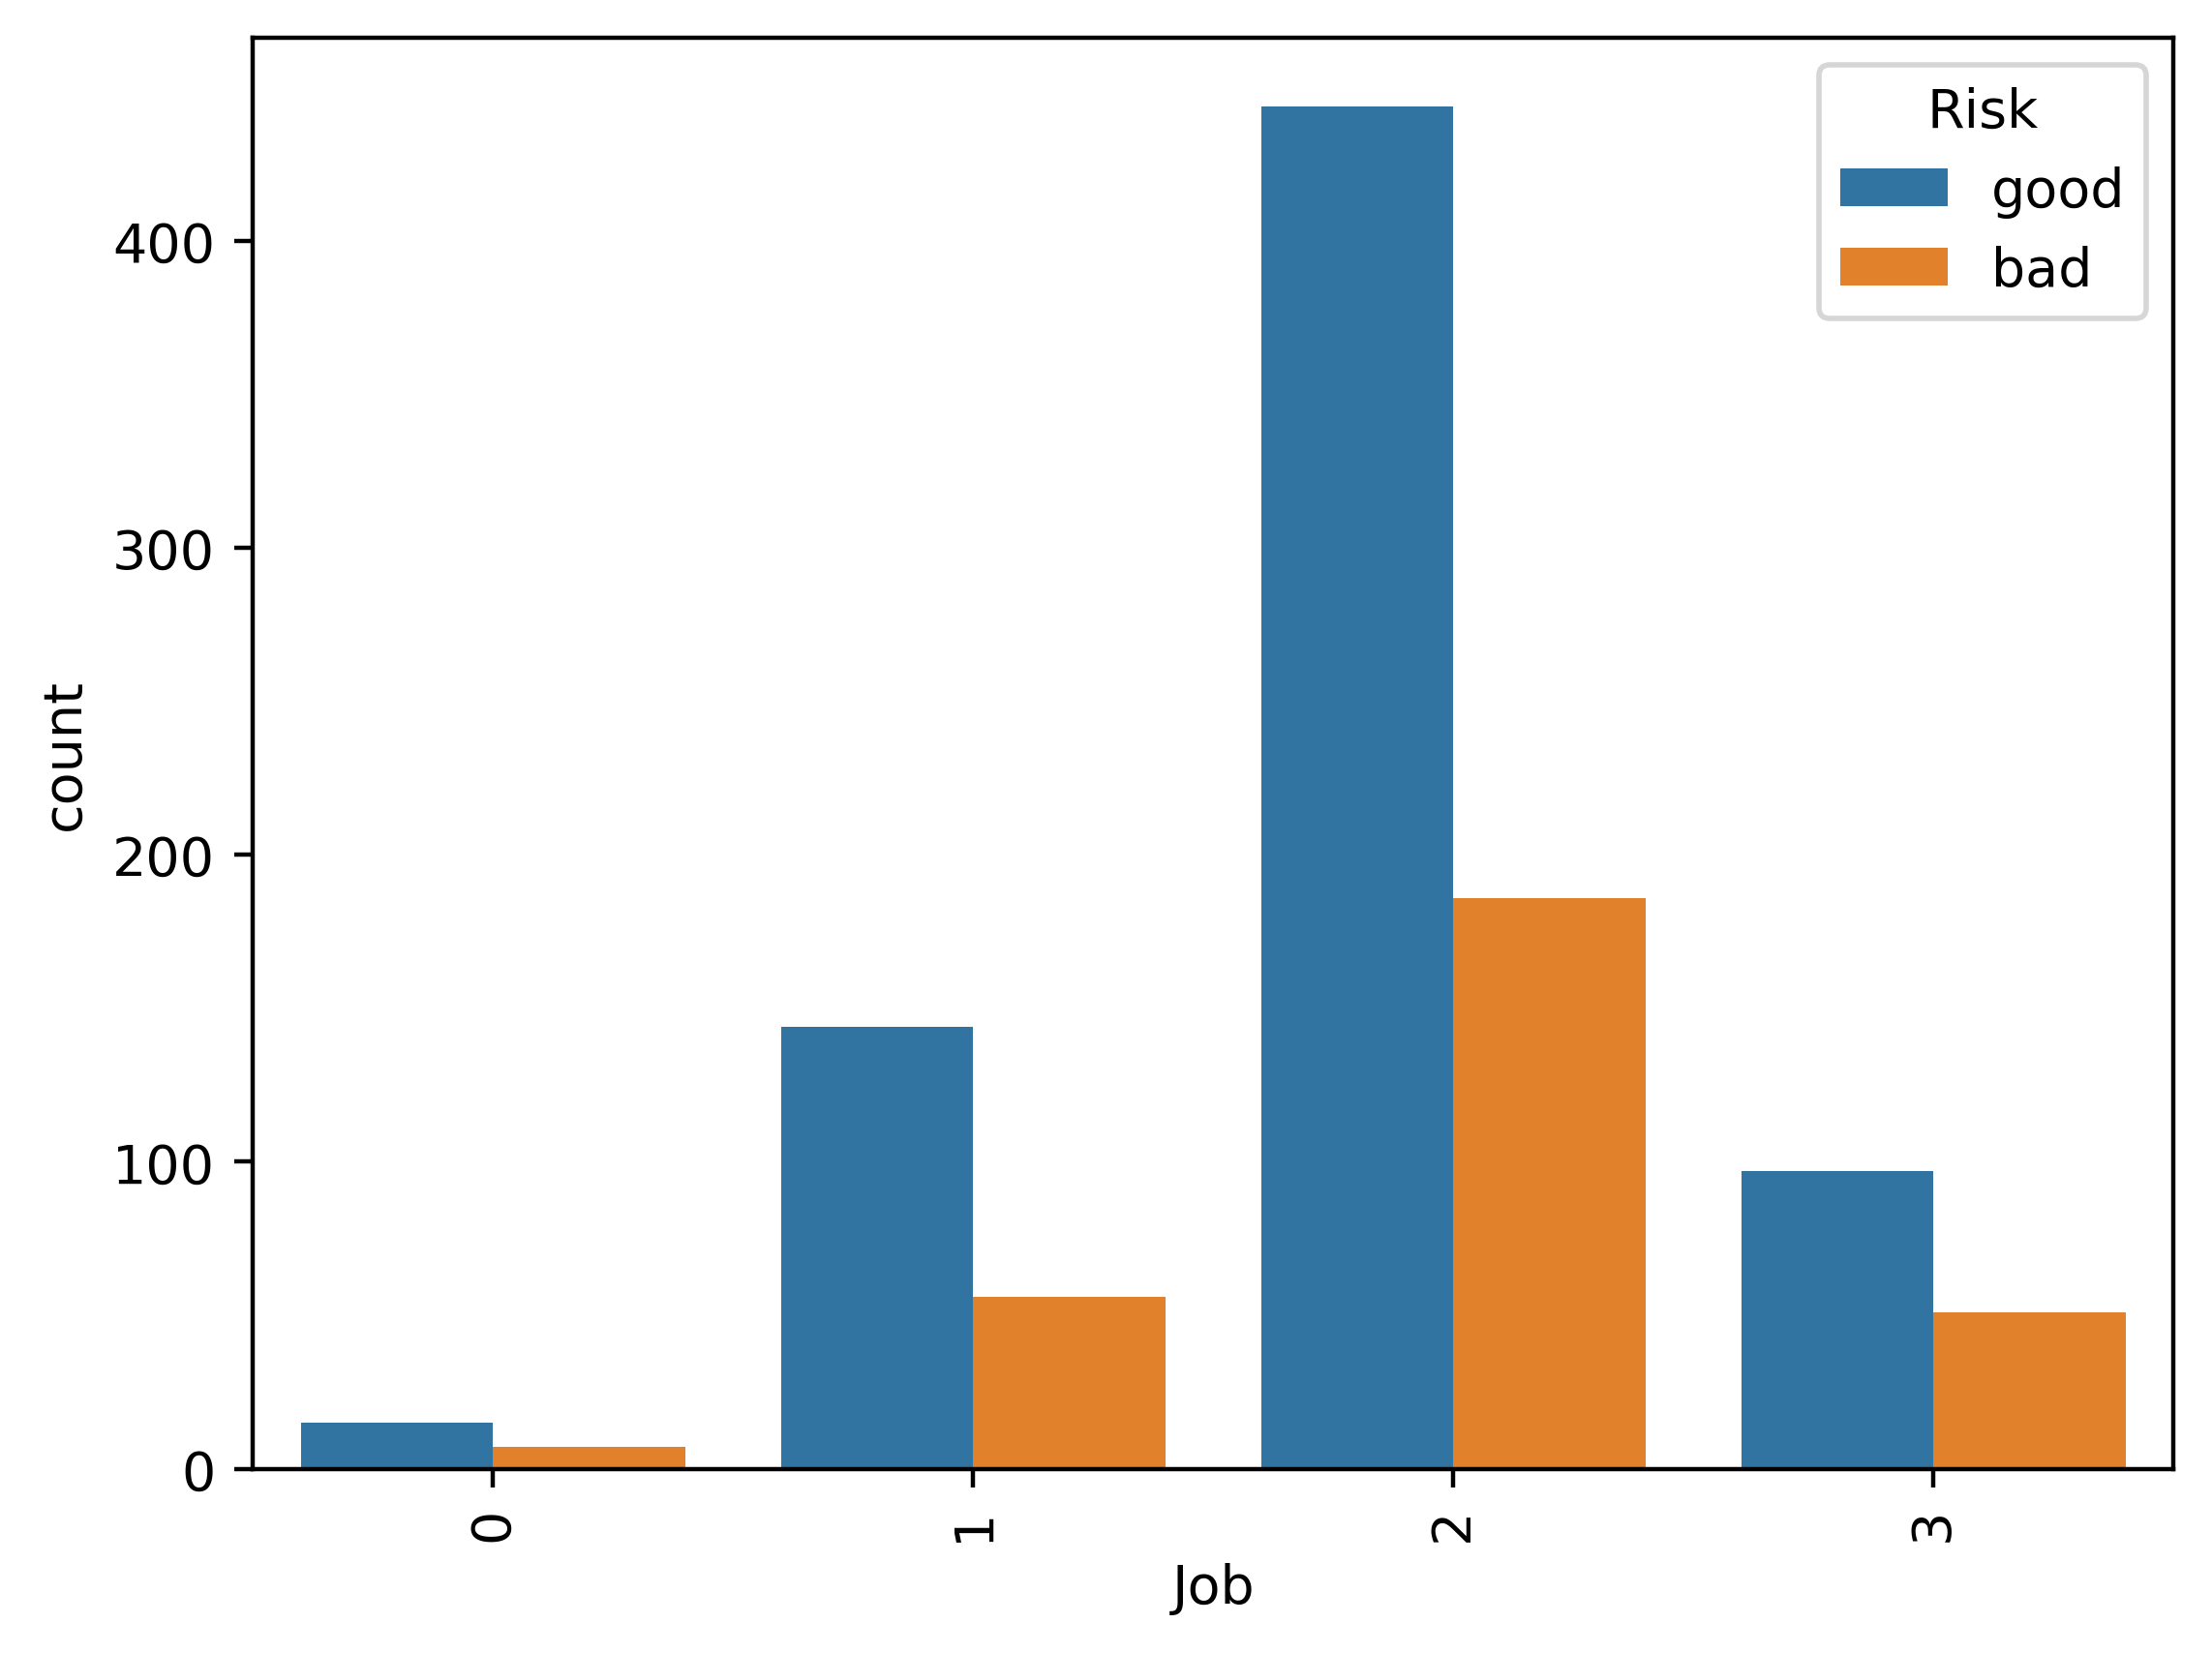

In [83]:
sns.countplot(data=df, x='Job', hue = 'Risk')
plt.xticks(rotation='vertical')
plt.show()

# Correlation analysis

# Categorical versus numerical

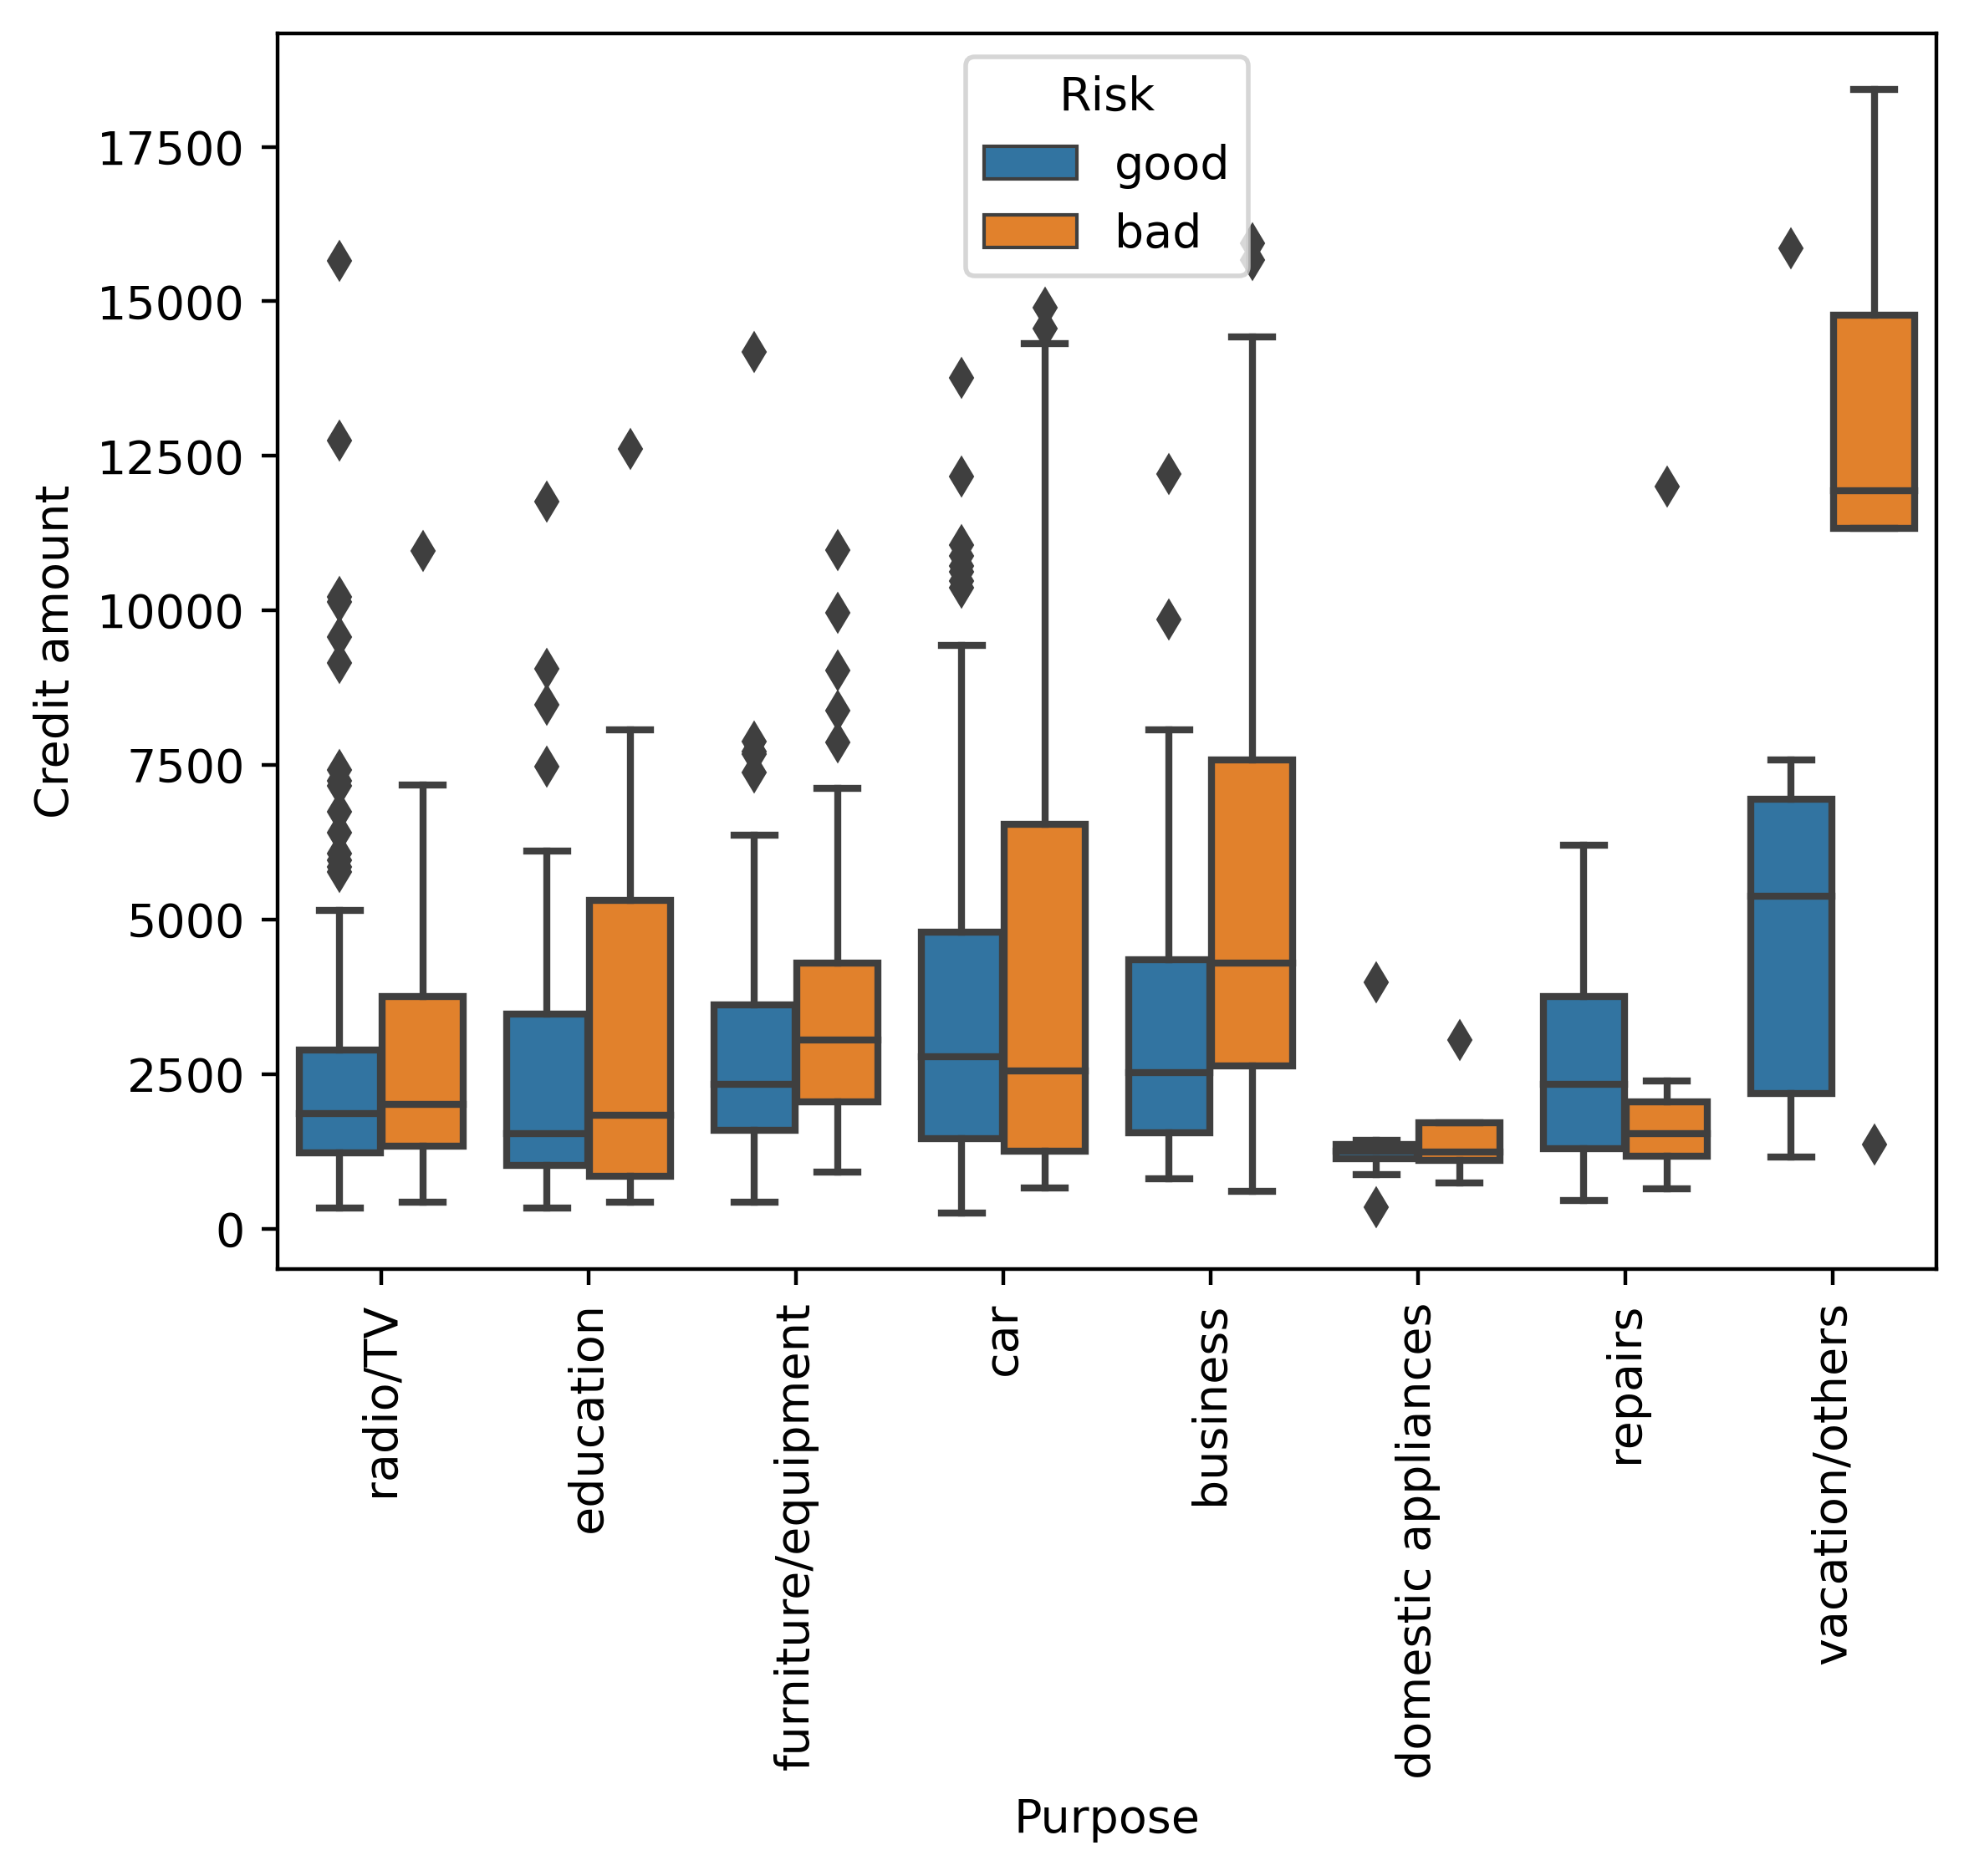

In [85]:
sns.boxplot(data=df, x = 'Purpose', y='Credit amount', hue ='Risk')
plt.xticks(rotation='vertical')
plt.show()

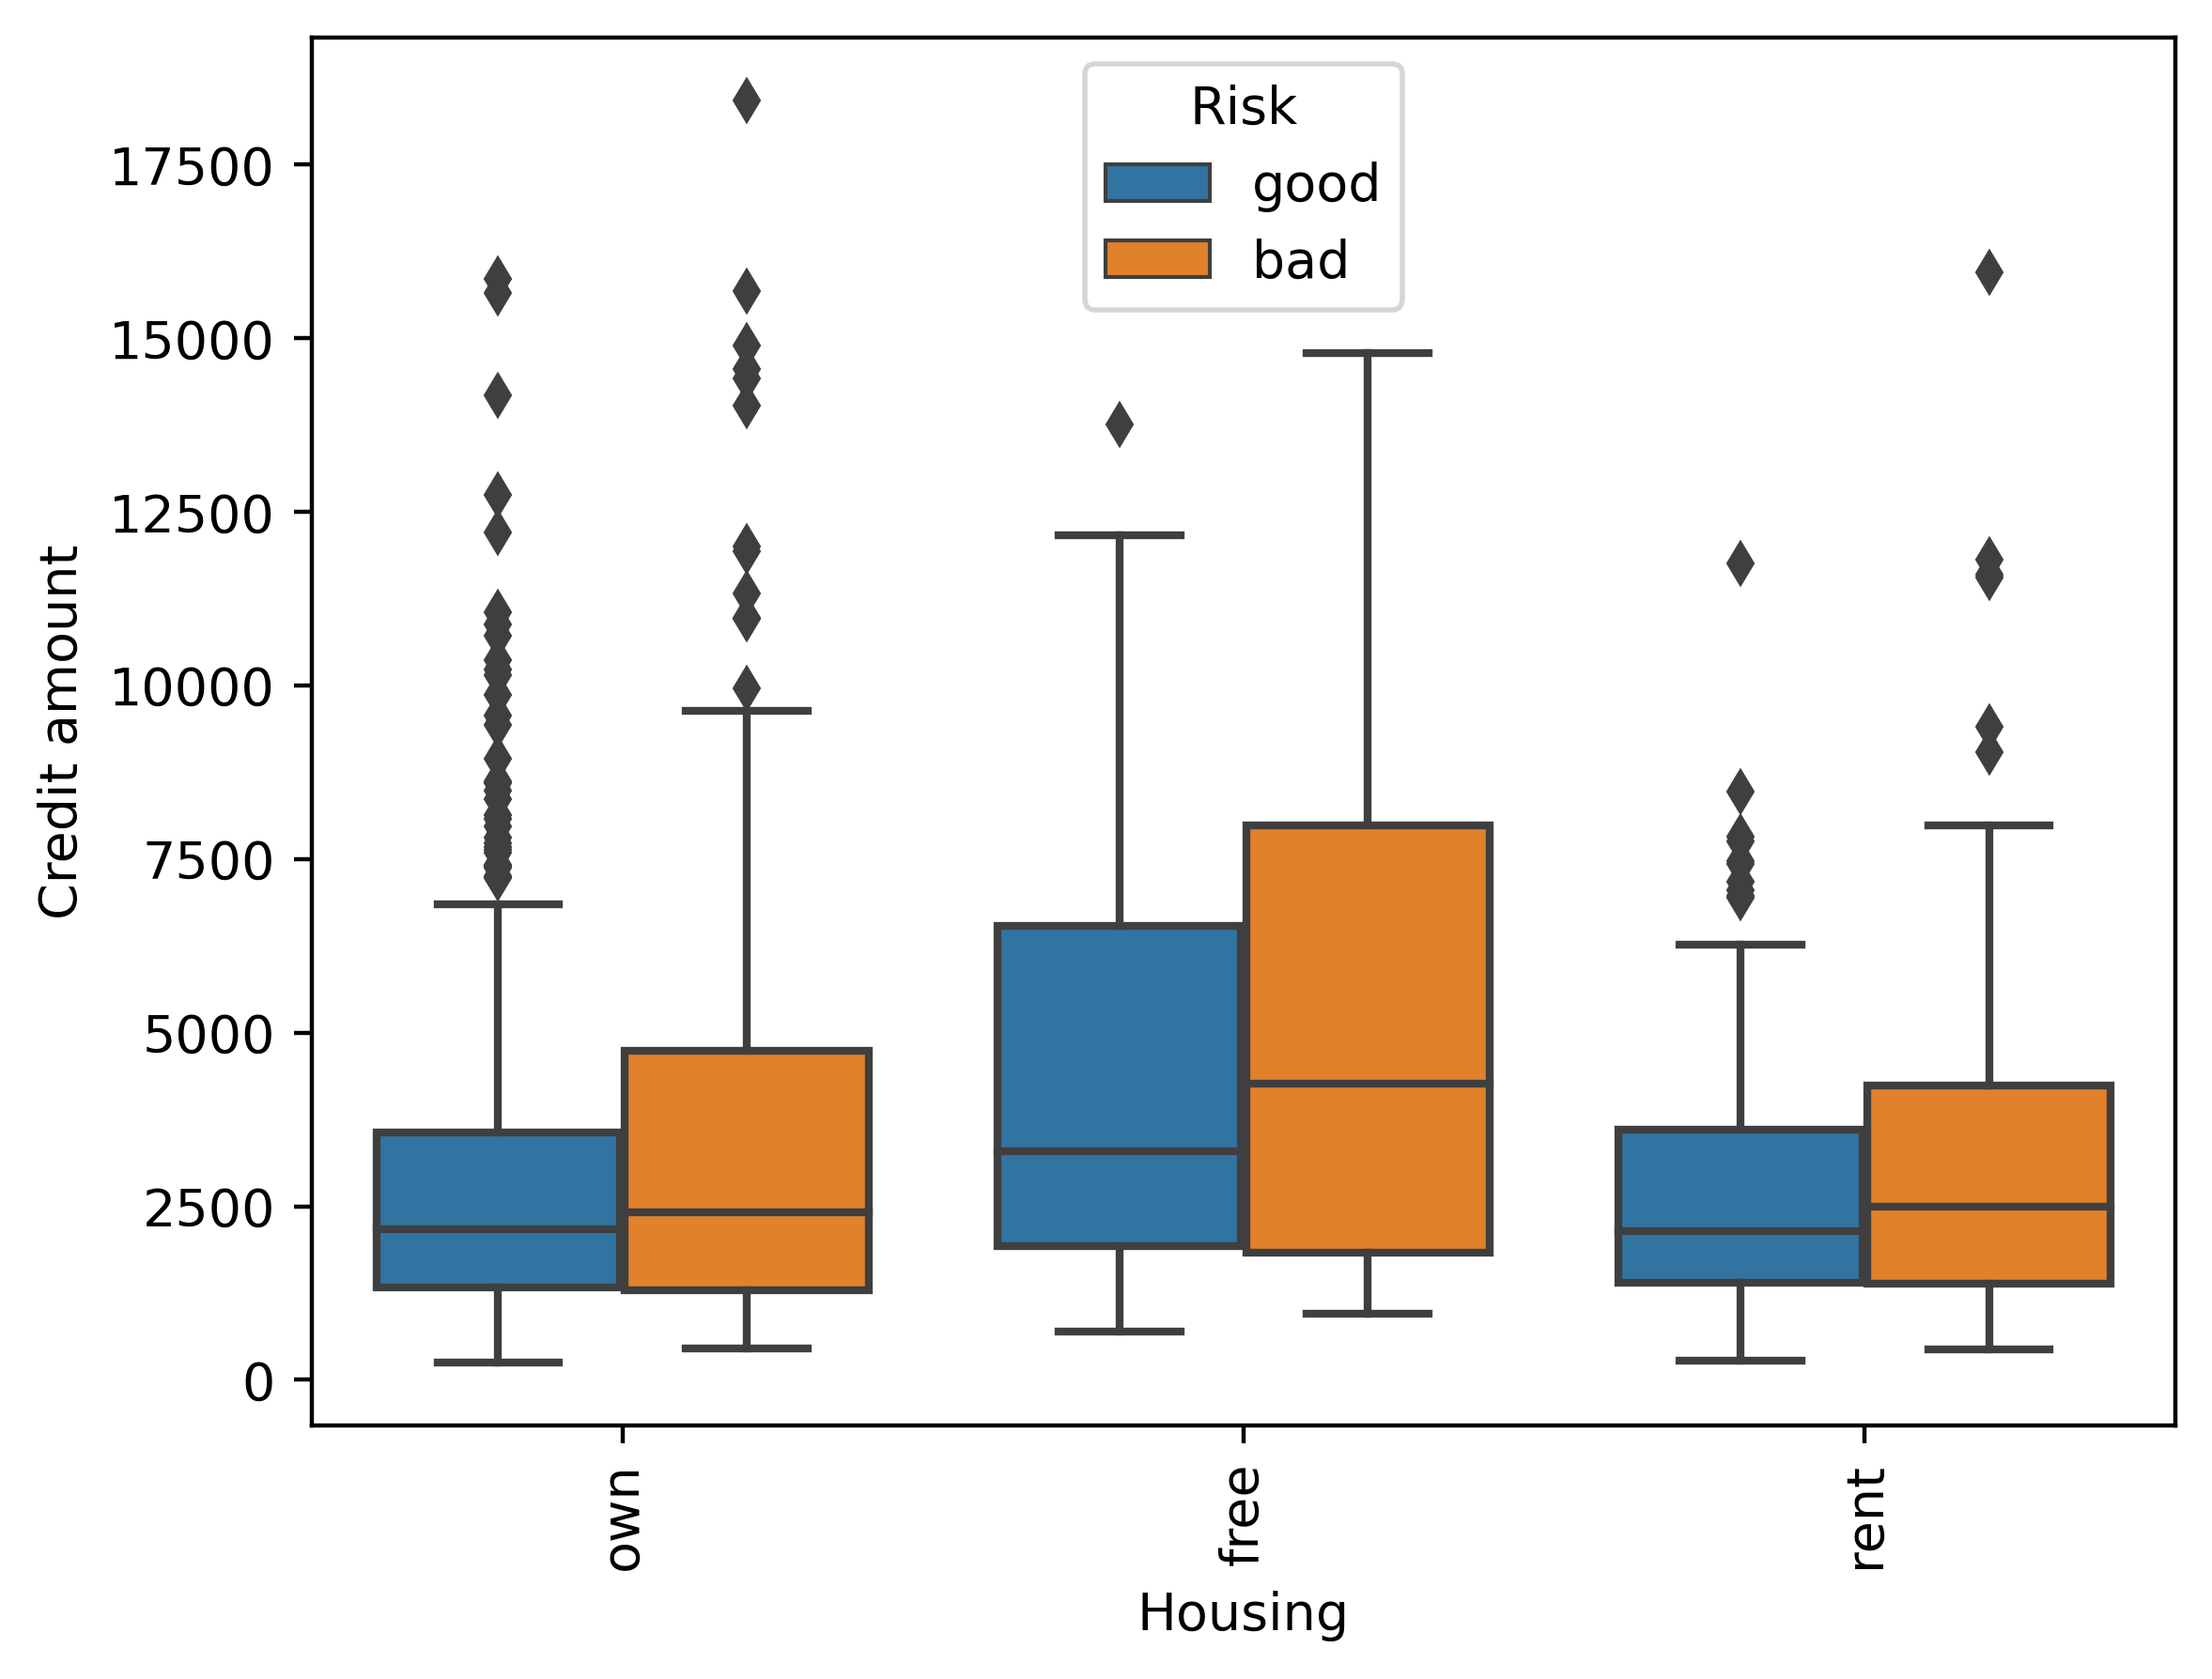

In [86]:
sns.boxplot(data=df, x = 'Housing', y='Credit amount', hue ='Risk')
plt.xticks(rotation='vertical')
plt.show()

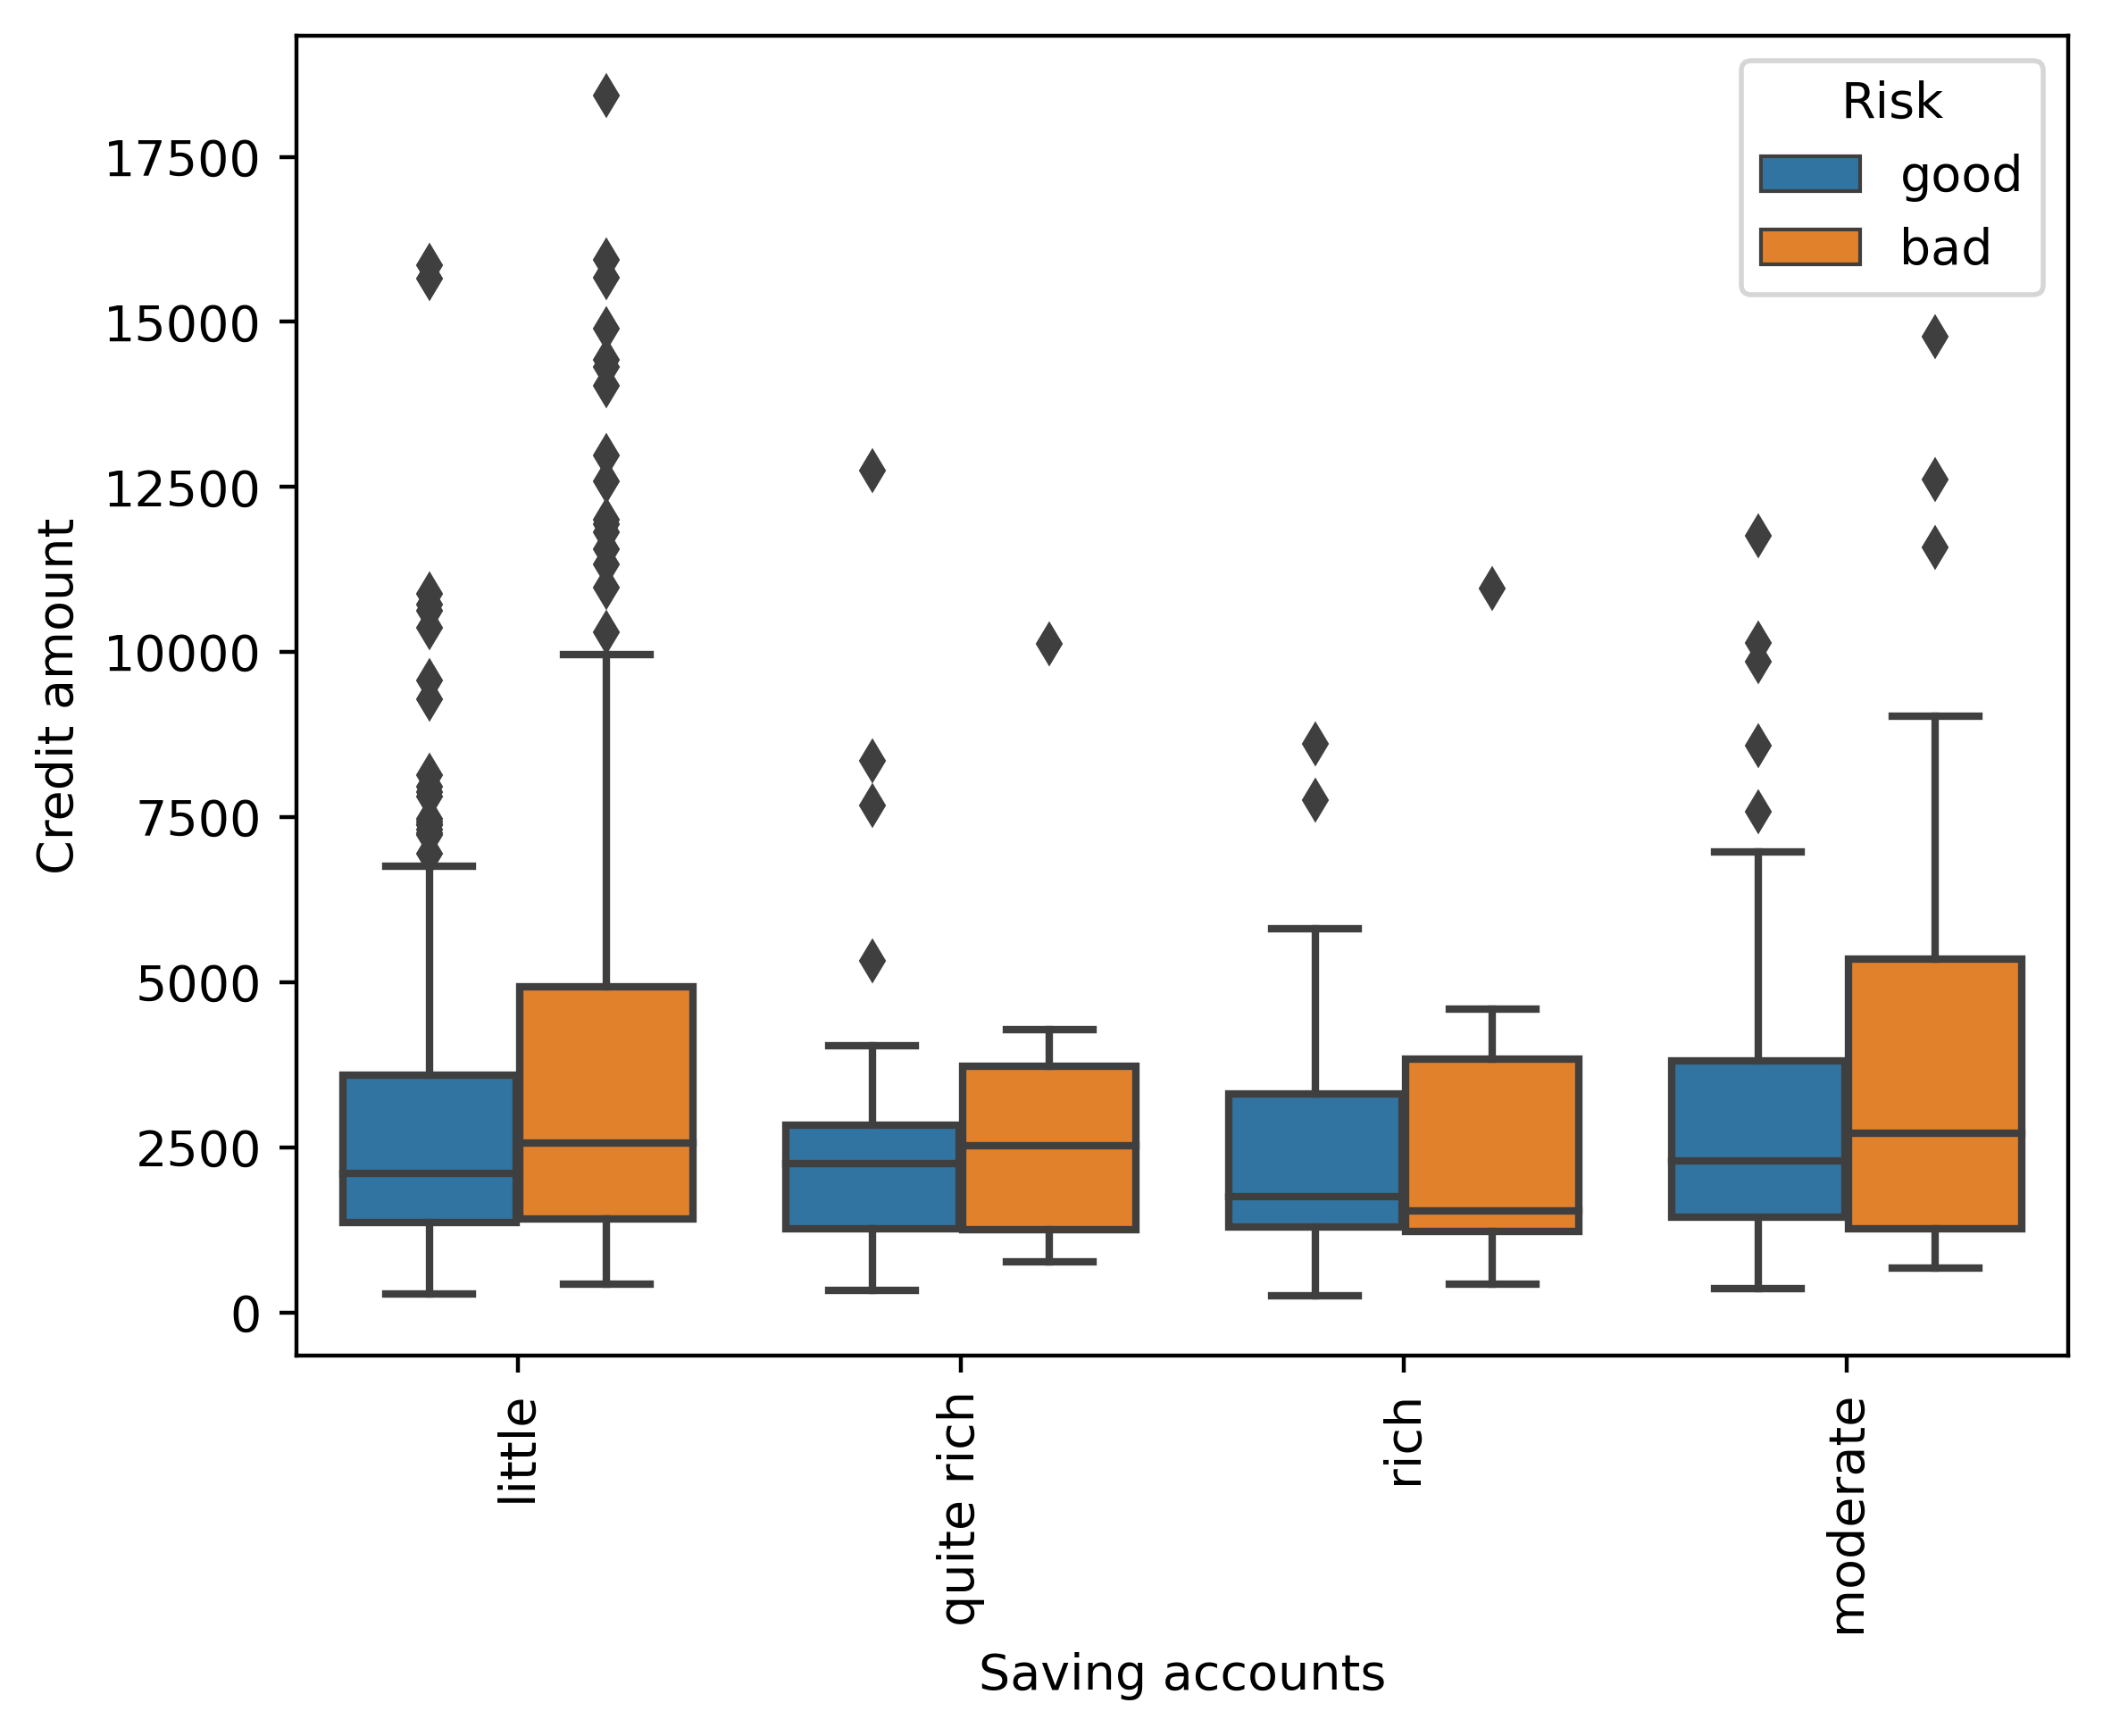

In [87]:

sns.boxplot(data=df, x = 'Saving accounts', y='Credit amount', hue ='Risk')
plt.xticks(rotation='vertical')
plt.show()

# Numerical versus numerical

C:\Users\55169\AppData\Local\Temp\ipykernel_124\4112564087.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = df.corr()


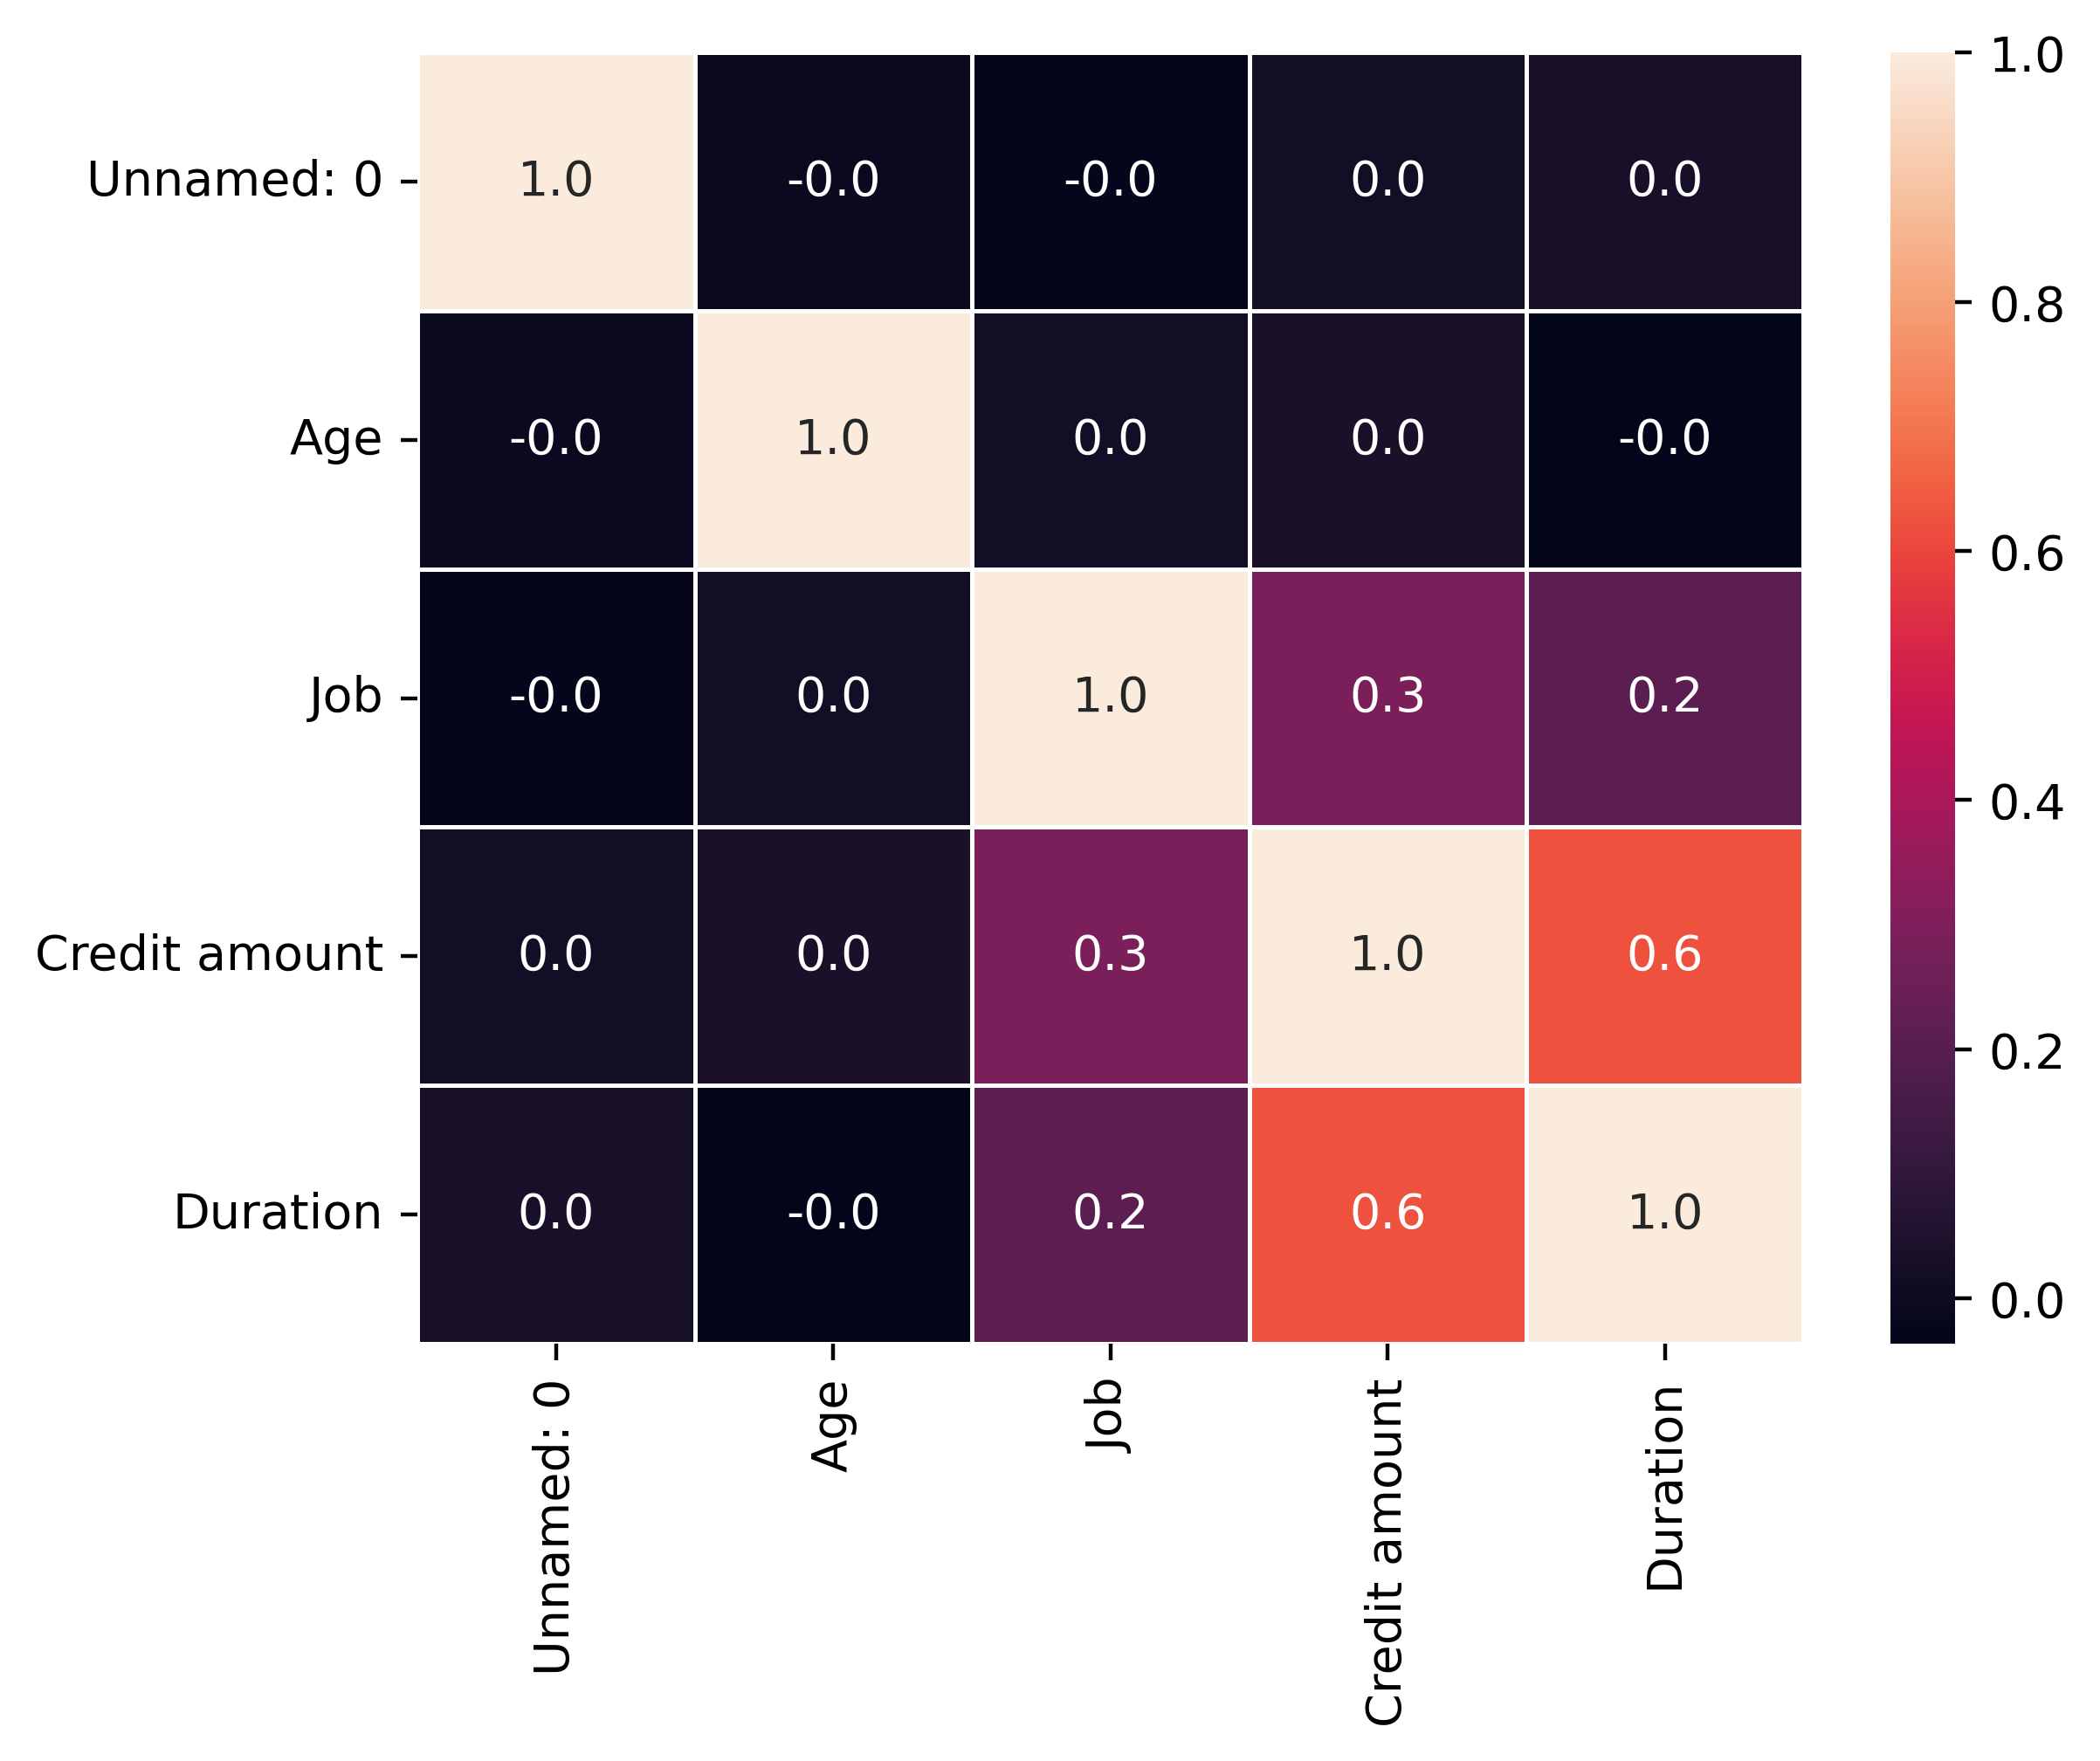

In [103]:
correlacao = df.corr()
plot = sns.heatmap(correlacao, annot = True, fmt=".1f", linewidths=.6)
plot
plt.show()